# Data Extraction and Initial Exploration

In [5]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the data
data = pd.read_csv("yahoo_stock.csv", parse_dates=['Date'])

print(data.info())

# Display the first few rows of the dataframe
data.head()
import statsmodels.api as sm
import warnings
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
warnings.filterwarnings("ignore")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1825 non-null   datetime64[ns]
 1   High       1825 non-null   float64       
 2   Low        1825 non-null   float64       
 3   Open       1825 non-null   float64       
 4   Close      1825 non-null   float64       
 5   Volume     1825 non-null   float64       
 6   Adj Close  1825 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 99.9 KB
None


In [6]:
data.isna().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [7]:
data.dtypes

Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Adj Close           float64
dtype: object

In [8]:
data.describe()

,Date,High,Low,Open,Close,Volume,Adj Close
count,1825,1825.000000,1825.000000,1825.000000,1825.000000,1.825000e+03,1825.000000
mean,2018-05-23 00:00:00,2660.718673,2632.817580,2647.704751,2647.856284,3.869627e+09,2647.856284
min,2015-11-23 00:00:00,1847.000000,1810.099976,1833.400024,1829.079956,1.296540e+09,1829.079956
25%,2017-02-21 00:00:00,2348.350098,2322.250000,2341.979980,2328.949951,3.257950e+09,2328.949951
50%,2018-05-23 00:00:00,2696.250000,2667.840088,2685.489990,2683.340088,3.609740e+09,2683.340088
75%,2019-08-22 00:00:00,2930.790039,2900.709961,2913.860107,2917.520020,4.142850e+09,2917.520020
max,2020-11-20 00:00:00,3645.989990,3600.159912,3612.090088,3626.909912,9.044690e+09,3626.909912
std,NaN,409.680853,404.310068,407.169994,407.301177,1.087593e+09,407.301177


## Import necessary Python packages 

In [9]:
import statsmodels.api as sm
import warnings
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
warnings.filterwarnings("ignore")

In [11]:
data = pd.read_csv("yahoo_stock.csv", parse_dates=['Date'])

# Ensure the Date column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set the Date column as the index for the time series
data.set_index('Date', inplace=True)

# Ensure the data is sorted by date
data.sort_index(inplace=True)

# Decompose the Close column
ts_data_close = data['Close']

# Perform seasonal decomposition on the Close column
decomposition = sm.tsa.seasonal_decompose(ts_data_close, model='additive', period=365)

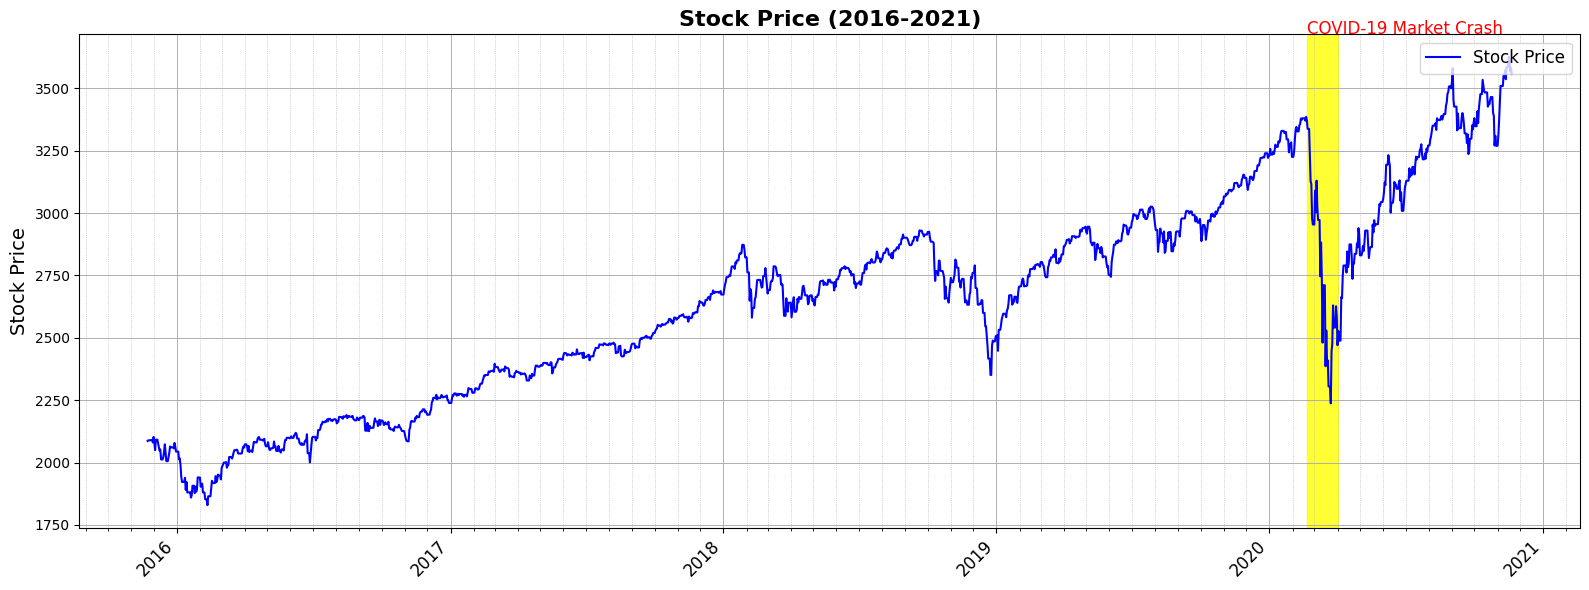

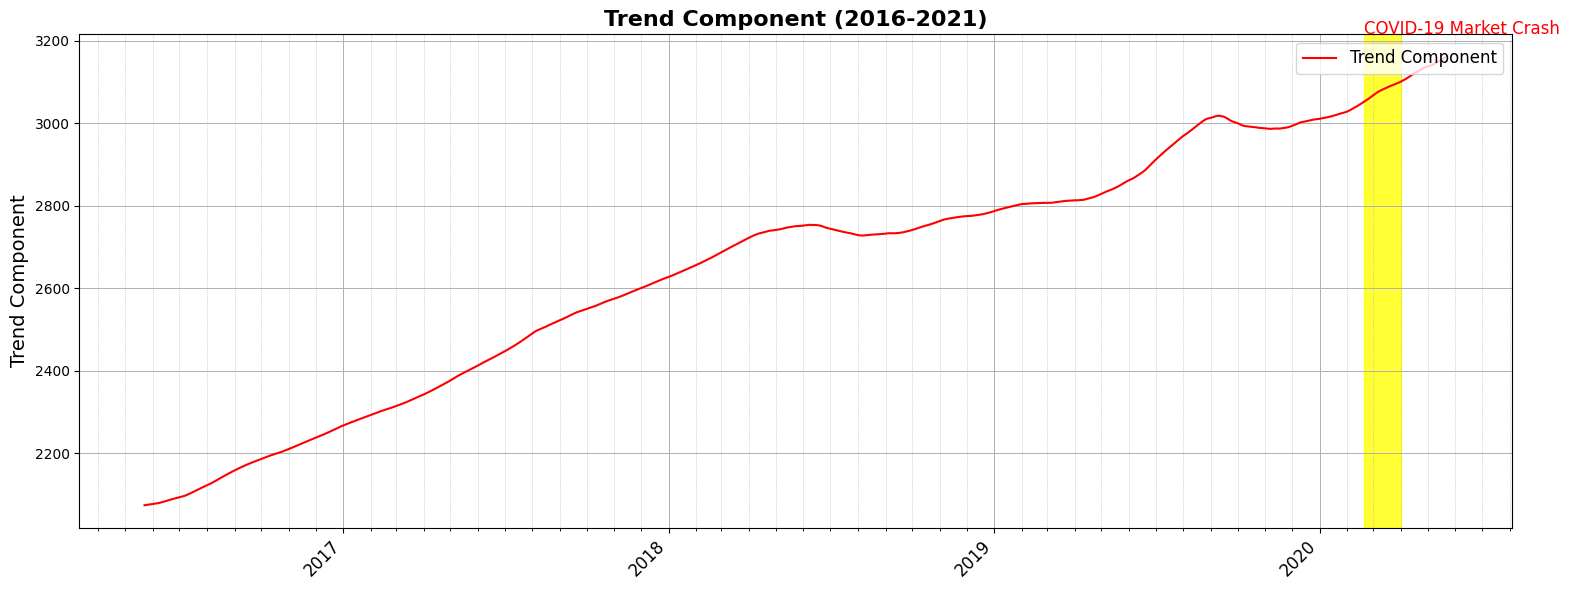

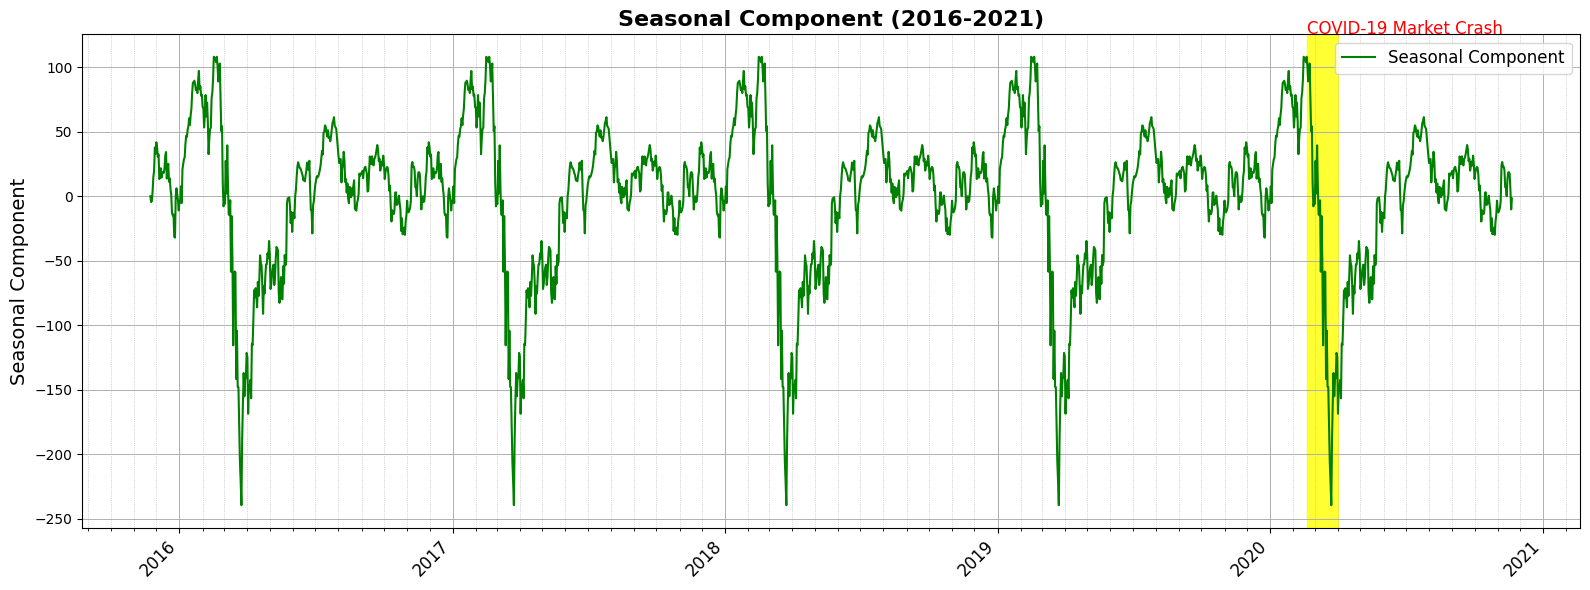

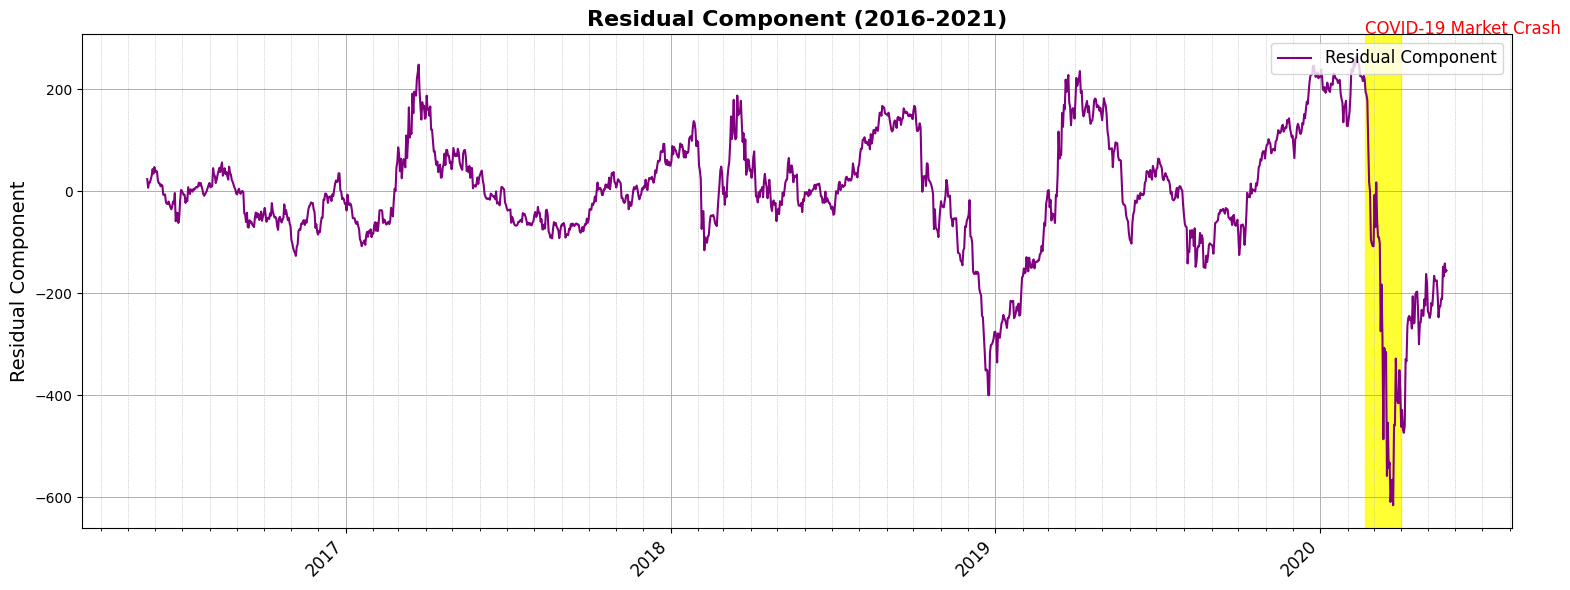

In [12]:
# Set the figure size globally
plt.rcParams['figure.figsize'] = [16, 6]

# Define the components and colors for individual plots
components = [
    ('Stock Price', ts_data_close, 'blue'),
    ('Trend Component', decomposition.trend, 'red'),
    ('Seasonal Component', decomposition.seasonal, 'green'),
    ('Residual Component', decomposition.resid, 'purple')
]

# Set up the date locators and formatters
year = mdates.YearLocator()
month = mdates.MonthLocator()
year_format = mdates.DateFormatter('%Y')

# Define the crash period
crash_start = pd.to_datetime('2020-02-20')
crash_end = pd.to_datetime('2020-04-01')

# Plot each component individually
for label, component, color in components:
    fig, ax = plt.subplots(figsize=(16, 6))
    
    # Plot the component
    ax.plot(component.index, component, color=color, label=label)
    ax.set_ylabel(label, fontsize=14)
    ax.legend(loc='upper right', fontsize=12)
    ax.grid(True, which='major', linestyle='-', linewidth=0.7)
    ax.grid(True, which='minor', linestyle=':', linewidth=0.5)

    # Set up the date locators and formatters
    ax.xaxis.set_major_locator(year)
    ax.xaxis.set_major_formatter(year_format)
    ax.xaxis.set_minor_locator(month)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
    
    # Highlight the 2020 crash
    ax.axvspan(crash_start, crash_end, color='yellow', alpha=0.8)
    ax.annotate('COVID-19 Market Crash', xy=(crash_start, ax.get_ylim()[1]), 
                xycoords='data', fontsize=12, color='red')
    
    # Add a title for each individual plot
    plt.title(f'{label} (2016-2021)', fontsize=16, fontweight='bold')
    
    # Show the plot
    plt.tight_layout()
    plt.show()


### Data values and trend decomposition plot

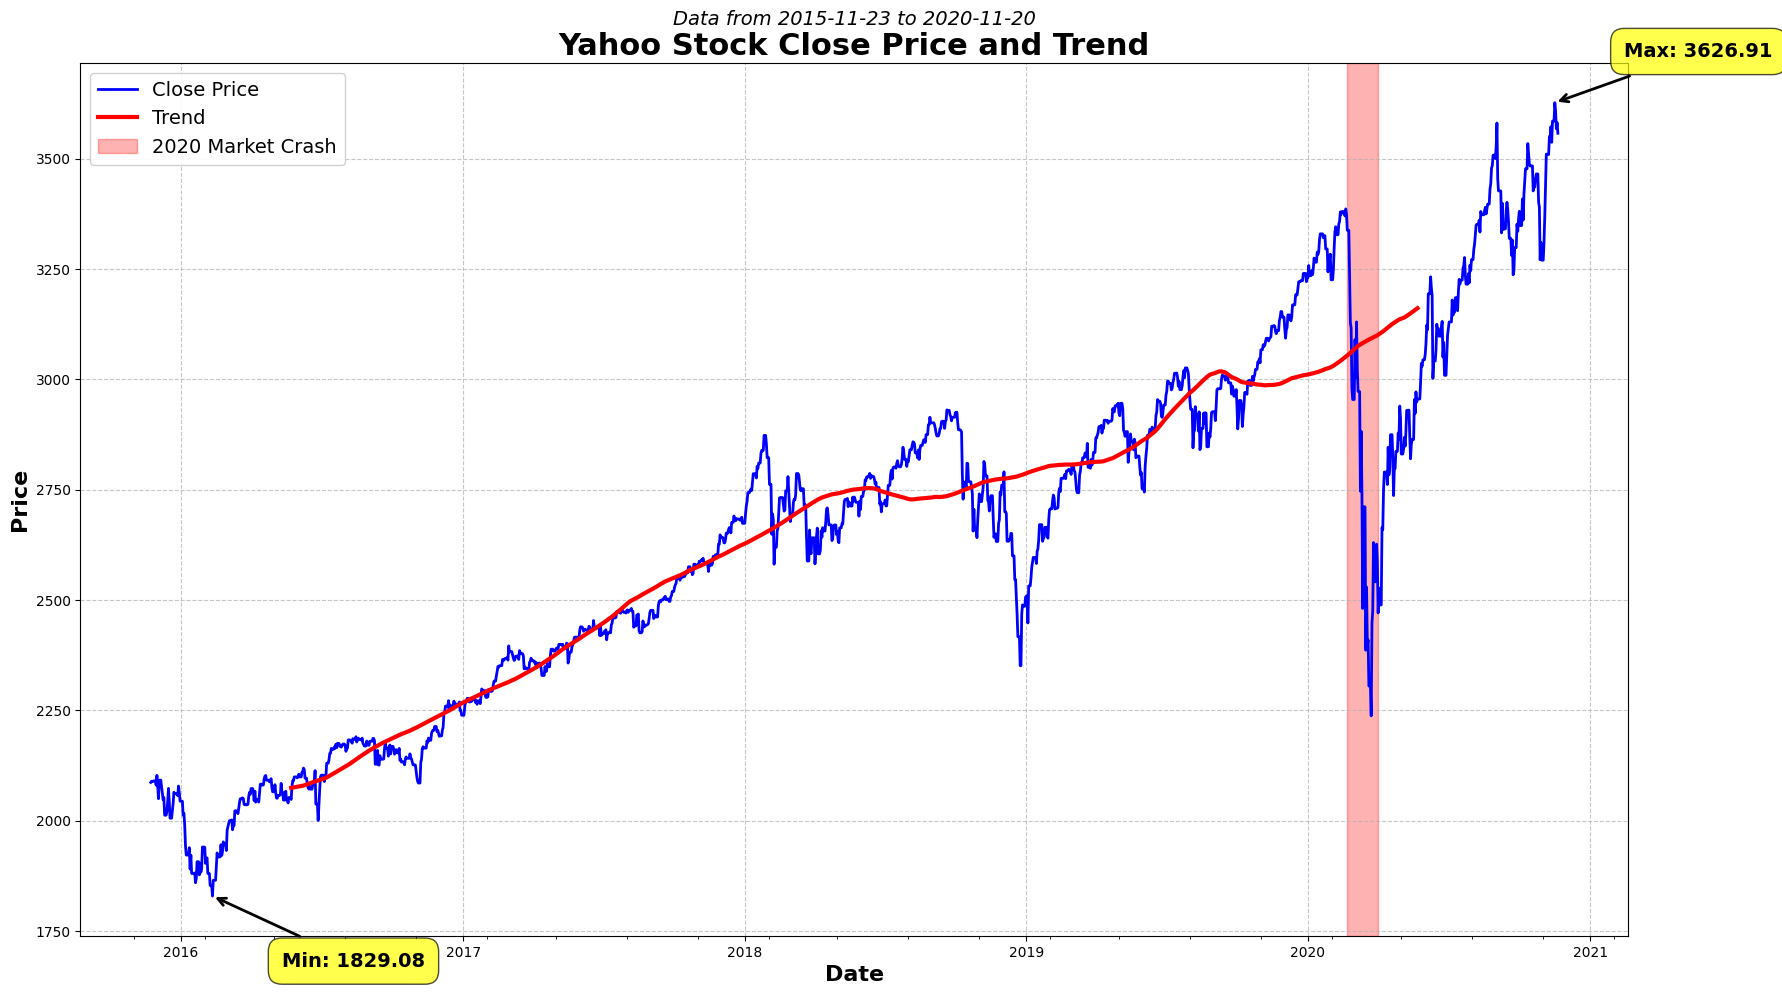

In [13]:
# Create the plot
fig, ax = plt.subplots(figsize=(18, 10))  # Increased figure size for presentations
ax.grid(True, linestyle='--', alpha=0.7)

# Set up the date locators and formatters
year = mdates.YearLocator()
month = mdates.MonthLocator(interval=3)
year_format = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)
ax.xaxis.set_minor_locator(month)

# Plot the data with enhanced line width for visibility
ax.plot(data.index, data['Close'], c='blue', label='Close Price', linewidth=2)
ax.plot(decomposition.trend.index, decomposition.trend, c='red', label='Trend', linewidth=3)

# Highlight the 2020 crash with clearer emphasis
crash_start = pd.to_datetime('2020-02-20')
crash_end = pd.to_datetime('2020-04-01')
ax.axvspan(crash_start, crash_end, color='red', alpha=0.3, label='2020 Market Crash')

# Add labels and title with increased size and bold formatting
ax.set_xlabel('Date', fontsize=16, fontweight='bold')
ax.set_ylabel('Price', fontsize=16, fontweight='bold')
ax.set_title('Yahoo Stock Close Price and Trend', fontsize=22, fontweight='bold')

# Add a subtitle with data date range
ax.text(0.5, 1.05, f'Data from {data.index.min().date()} to {data.index.max().date()}', 
        horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, 
        fontsize=14, style='italic')

# Enhance the legend with larger font size and bold style
ax.legend(loc='upper left', frameon=True, framealpha=0.9, fontsize=14, title_fontsize='13')

# Annotate significant points (max and min) with larger text, bold, and arrows
max_point = data['Close'].idxmax()
min_point = data['Close'].idxmin()

ax.annotate(f'Max: {data.loc[max_point, "Close"]:.2f}', 
            xy=(max_point, data.loc[max_point, 'Close']),
            xytext=(50, 30), textcoords='offset points', 
            ha='left', va='bottom',
            fontsize=14, fontweight='bold', 
            bbox=dict(boxstyle='round,pad=0.7', fc='yellow', alpha=0.7),
            arrowprops=dict(arrowstyle='->', lw=2, connectionstyle='arc3,rad=0'))

ax.annotate(f'Min: {data.loc[min_point, "Close"]:.2f}', 
            xy=(min_point, data.loc[min_point, 'Close']),
            xytext=(50, -40), textcoords='offset points', 
            ha='left', va='top',
            fontsize=14, fontweight='bold', 
            bbox=dict(boxstyle='round,pad=0.7', fc='yellow', alpha=0.7),
            arrowprops=dict(arrowstyle='->', lw=2, connectionstyle='arc3,rad=0'))

# Adjust layout and display
plt.tight_layout()
plt.show()


## Data Normalization and Standardization

In [14]:
# from pandas import Series
# from sklearn.preprocessing import MinMaxScaler
# import matplotlib.pyplot as plt

# # Prepare data for normalization
# values = data['Close'].values
# values = values.reshape((len(values), 1))

# # Train the normalization
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaler = scaler.fit(values)

# # Print the min and max values used for normalization
# print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

# # Normalize the dataset and print the first 5 rows
# normalized = scaler.transform(values)
# print("First 5 rows of normalized data:")
# for i in range(5):
#     print(normalized[i])

# # Inverse transform and print the first 5 rows
# inversed = scaler.inverse_transform(normalized)
# print("\nFirst 5 rows after inverse transformation:")
# for i in range(5):
#     print(inversed[i])

# # Plot the normalized data
# plt.figure(figsize=(18, 8))  # Increase figure size for better visibility

# # Plot normalized data with labels and grid
# plt.plot(data.index, normalized, color='blue', linewidth=2)
# plt.title('Normalized Yahoo Stock Close Prices', fontsize=22, fontweight='bold')
# plt.xlabel('Date', fontsize=16, fontweight='bold')
# plt.ylabel('Normalized Price', fontsize=16, fontweight='bold')

# # Rotate and format the x-axis labels for better readability
# plt.xticks(rotation=45, ha='right', fontsize=12)
# plt.yticks(fontsize=12)

# # Add grid for better visualization
# plt.grid(True, linestyle='--', alpha=0.7)

# # Adjust layout for presentation
# plt.tight_layout()

# # Show the plot
# plt.show()


In [15]:
import datetime as dt
import os

from collections import UserDict
from glob import glob
import pandas as pd
import numpy as np
from IPython.display import Image

# Setting options for pandas and numpy
pd.options.display.float_format = '{:.2f}'.format  # Set pandas float format
np.set_printoptions(precision=2)  # Set numpy precision for printed floats


# Display the first few rows of the dataframe
data.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,2095.61,2081.39,2089.41,2086.59,3587980000.00,2086.59
2015-11-24,2094.12,2070.29,2084.42,2089.14,3884930000.00,2089.14
2015-11-25,2093.00,2086.30,2089.30,2088.87,2852940000.00,2088.87
2015-11-26,2093.00,2086.30,2089.30,2088.87,2852940000.00,2088.87
2015-11-27,2093.29,2084.13,2088.82,2090.11,1466840000.00,2090.11


<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

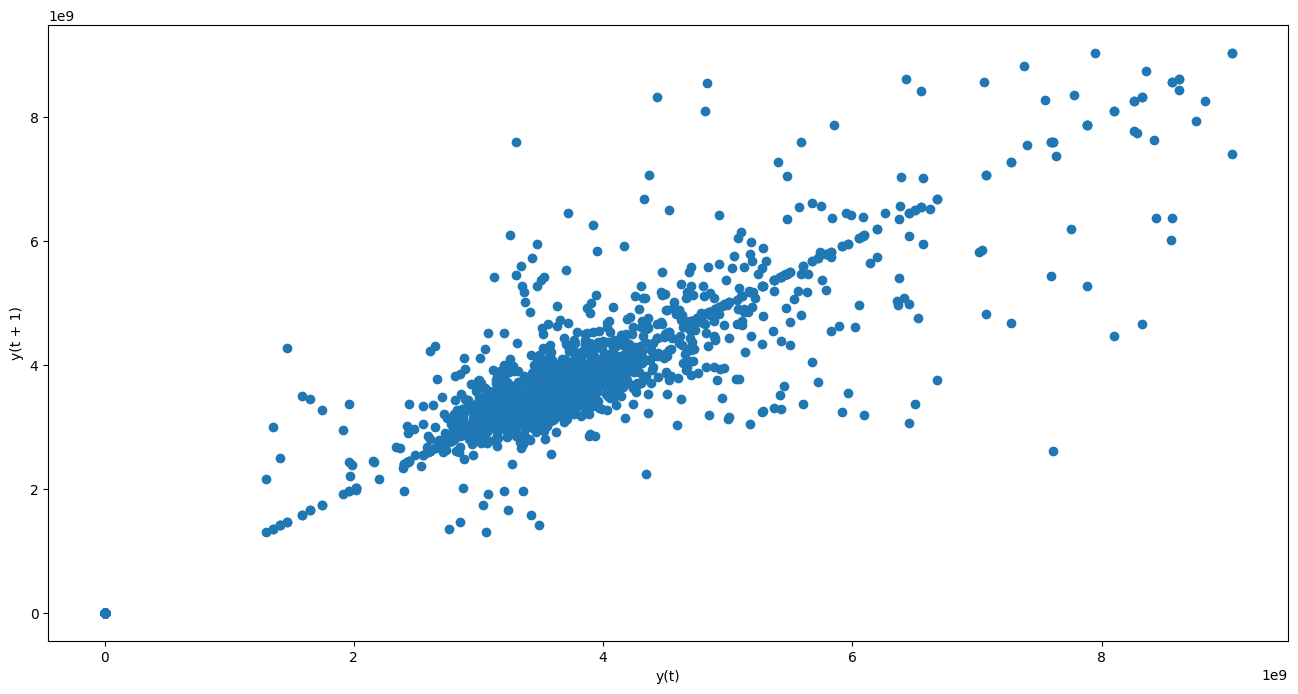

In [16]:
# Import lag_plot function
from pandas.plotting import lag_plot
plt.figure(figsize=(16, 8))
# Pass the lag argument and plot the values. 
# When lag=1 the plot is essentially data[:-1] vs. data[1:]
# Plot our ts_data_load set
lag_plot(data)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

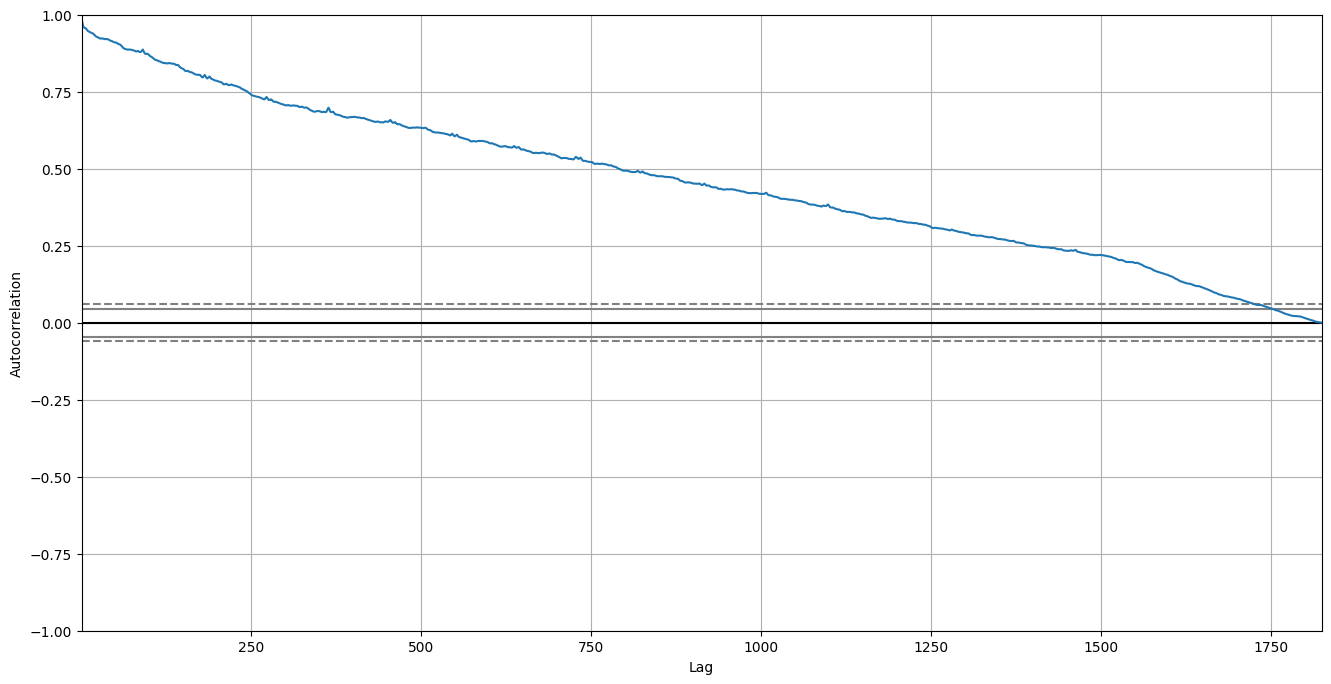

In [17]:
# Import autocorrelation_plot function
from pandas.plotting import autocorrelation_plot
fig = plt.subplots(figsize=(16, 8))  # Create an axes object with specific size
# Pass the autocorrelation argument and plot the values
autocorrelation_plot(data)

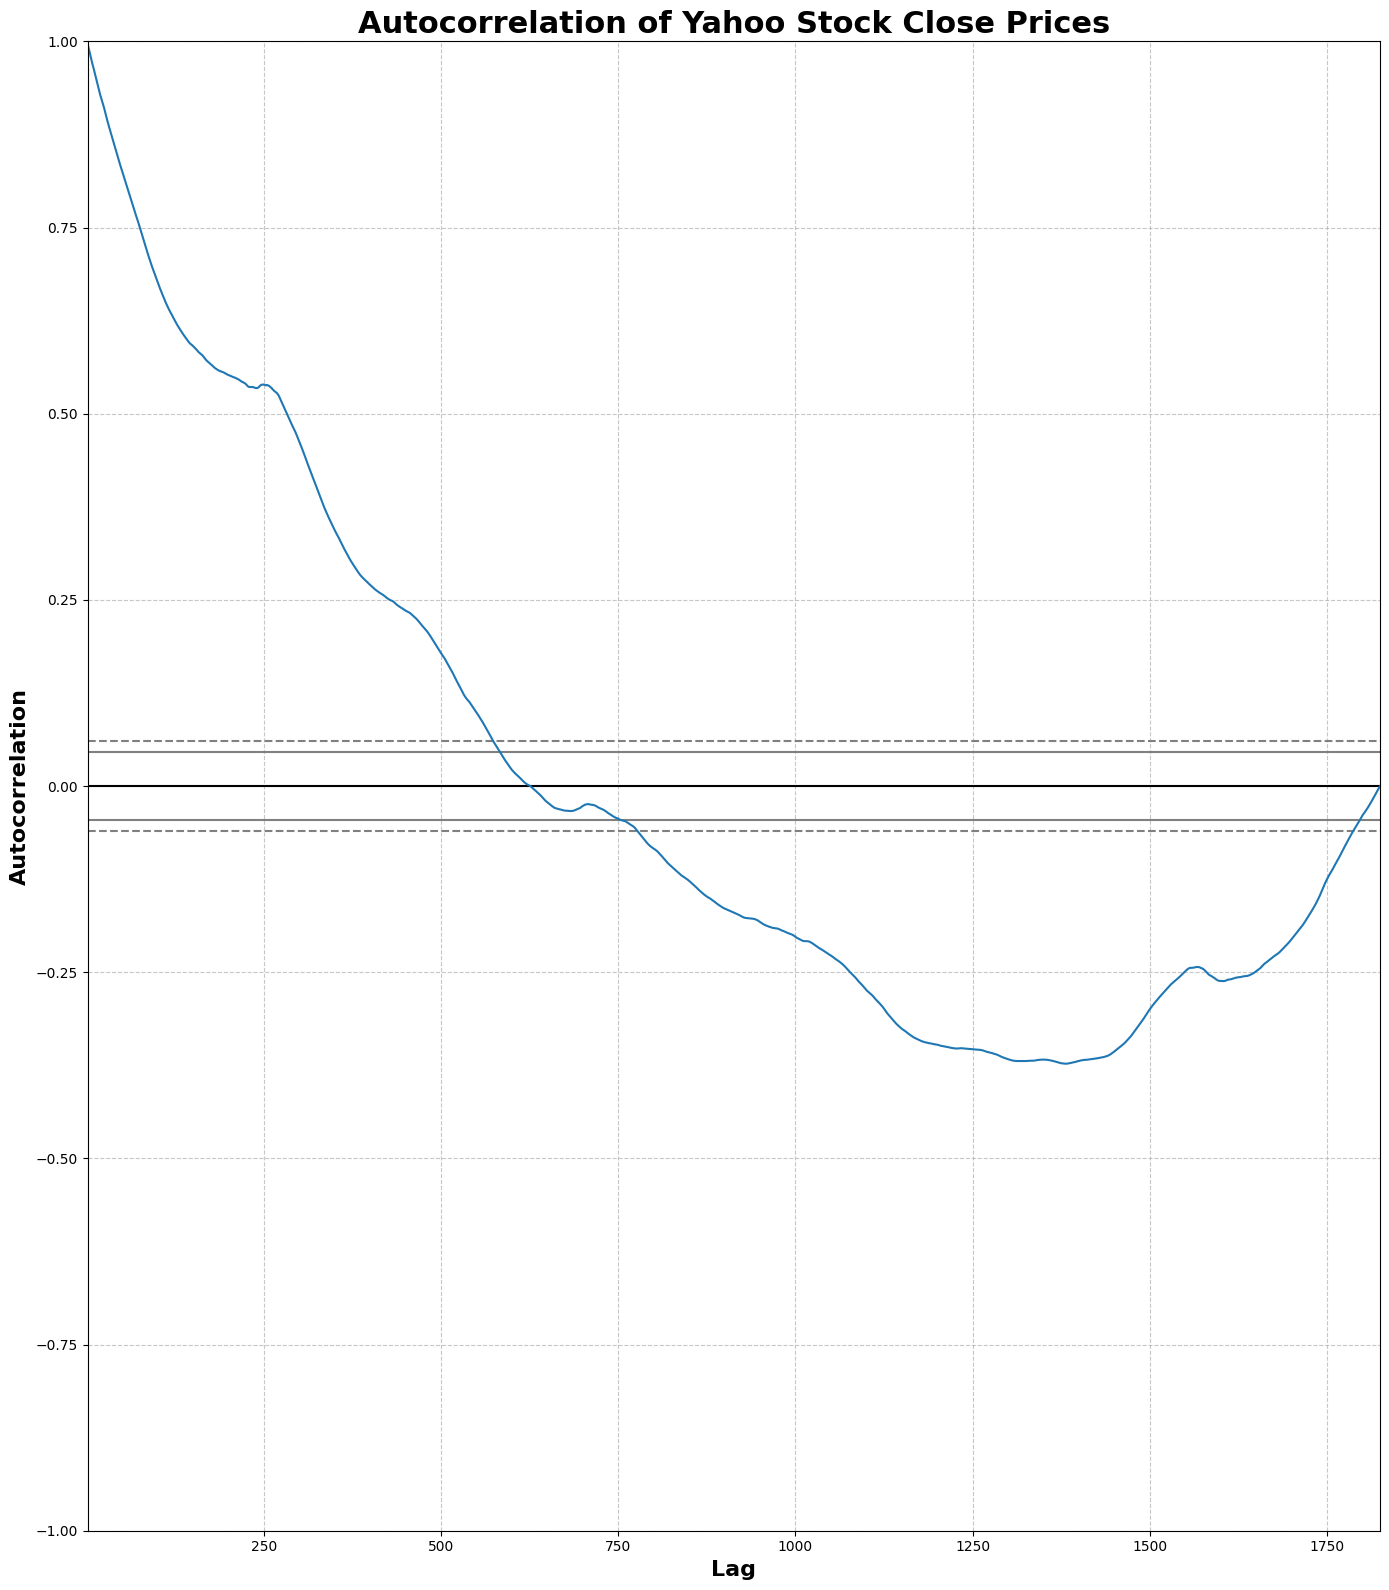

In [18]:
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

# Create the plot with an increased figure size
plt.figure(figsize=(14, 16))  # Increased size for presentation visibility

# Plot the autocorrelation of the 'Close' column
autocorrelation_plot(data['Close'])

# Add a title and axis labels with enhanced font sizes and bold text
plt.title('Autocorrelation of Yahoo Stock Close Prices', fontsize=22, fontweight='bold')
plt.xlabel('Lag', fontsize=16, fontweight='bold')
plt.ylabel('Autocorrelation', fontsize=16, fontweight='bold')

# Add gridlines for better visual clarity
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust the layout to ensure the plot looks well-aligned
plt.tight_layout()

# Show the plot
plt.show()


#### The slow decay suggests the series is likely non-stationary.

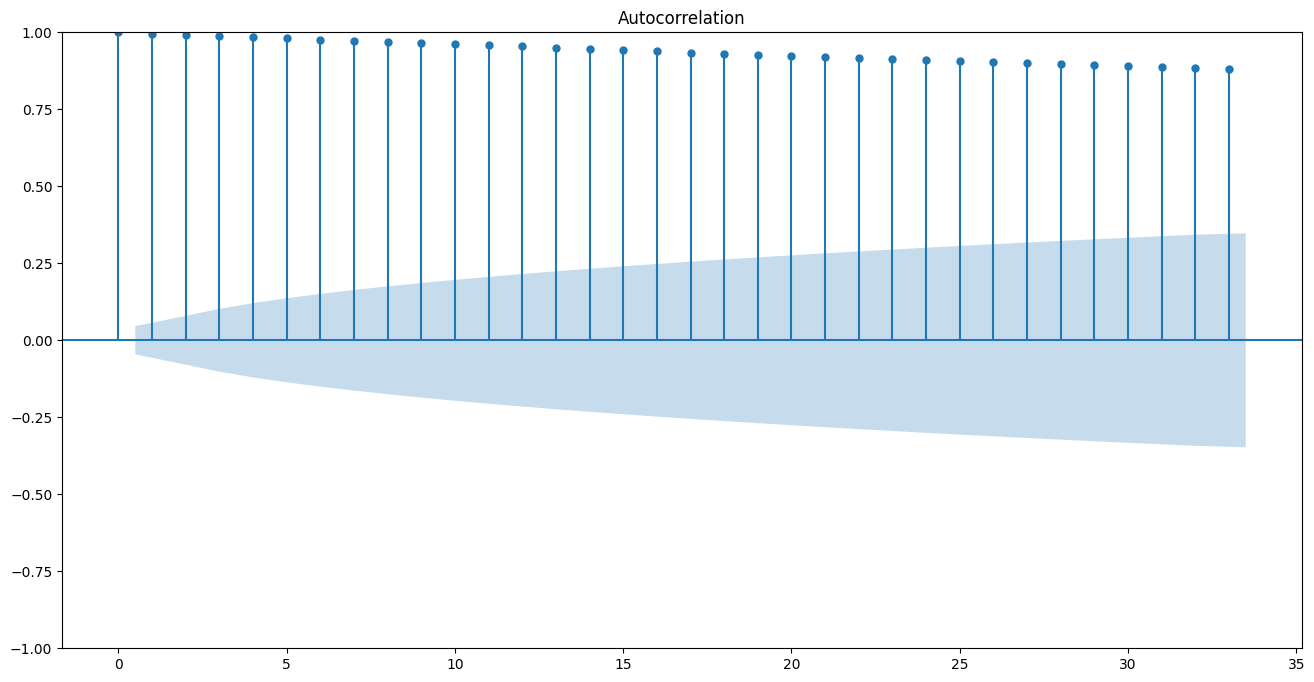

In [19]:
# Import plot_acf() function
import matplotlib.pyplot as plt  # Import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
# Plot the acf function on the ts_data_load_subset
fig, ax = plt.subplots(figsize=(16, 8))  # Create an axes object with specific size

plot_acf(data['Close'], ax=ax )

plt.show()


###### 
Analysis:

The ACF plot shows very high autocorrelation at low lags, slowly decreasing over time.

All autocorrelations are positive and significant (above the confidence interval).

The confidence interval (blue shaded area) widens as the lag increases.

Insights:

Confirms the strong temporal dependence in the series.

The series is likely non-stationary due to the slow decay of autocorrelations.

There's no clear seasonality visible in this ACF plot.

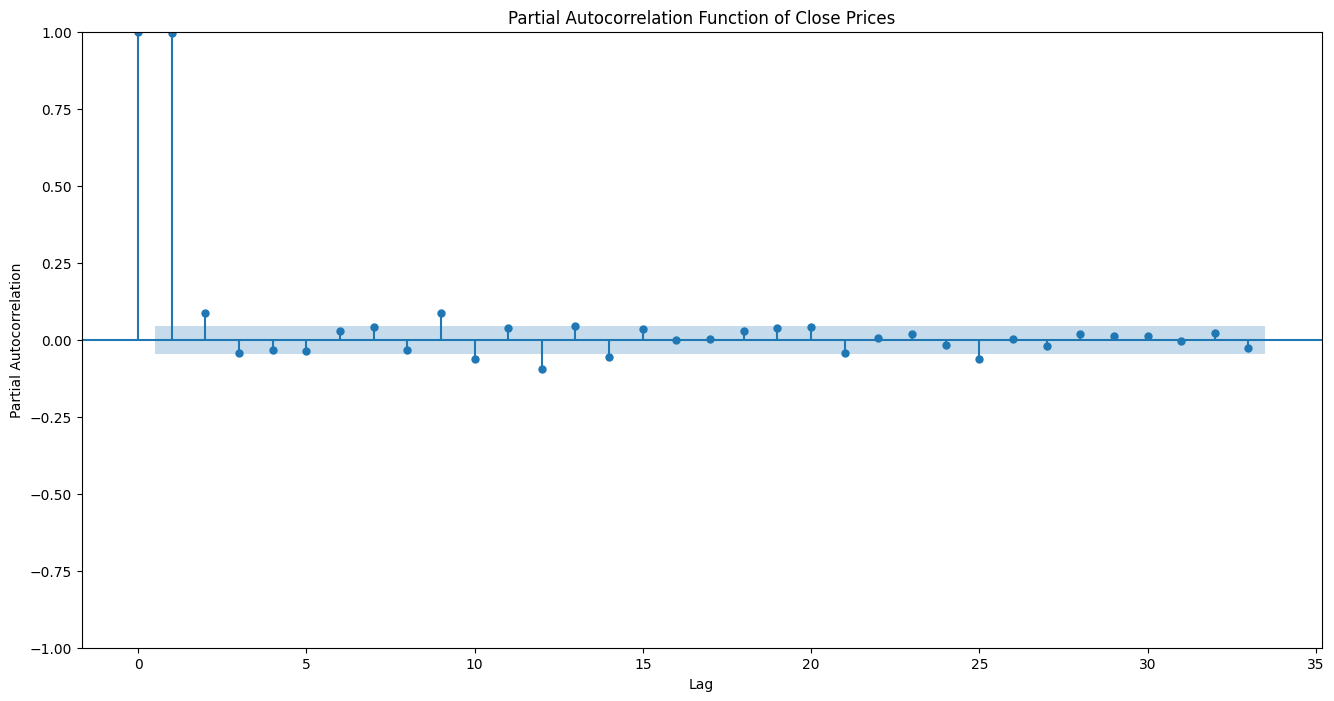

In [20]:
# Import necessary libraries
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Create a figure with a specific size (width, height) in inches
fig, ax = plt.subplots(figsize=(16, 8))  # Create an axes object with specific size

# Plot the acf function on the data['Close'] subset on the created axes
plot_pacf(data['Close'], ax=ax)
ax.set_title('Partial Autocorrelation Function of Close Prices')
ax.set_xlabel('Lag')
ax.set_ylabel('Partial Autocorrelation')
# Show the plot
plt.show()


### The strong lag 1 partial autocorrelation suggests that an AR(1) (Autoregressive model of order 1) might be appropriate for this time series.

### There are no obvious cyclical or seasonal patterns visible in the PACF plot.

### This PACF plot suggests that a simple model like ARIMA(1,d,q) might be suitable. Might also try ARIMA(1,d,1)

### Stationarity: The rapid decay in partial autocorrelations after lag 1 is a good sign, but doesn't guarantee stationarity. You should still perform formal stationarity tests.

#### AUTOREG MODEL RESULTS

In [22]:
# Import necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics
# Apply AutoReg model
model = AutoReg(data['Close'], 1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1825
Model:                     AutoReg(1)   Log Likelihood               -8626.385
Method:               Conditional MLE   S.D. of innovations             27.397
Date:                Sun, 27 Apr 2025   AIC                          17258.770
Time:                        17:33:44   BIC                          17275.296
Sample:                    11-24-2015   HQIC                         17264.866
                         - 11-20-2020                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5653      4.224      1.081      0.280      -3.714      12.845
Close.L1       0.9986      0.002    633.156      0.000       0.995       1.002
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0014           +0.0000j            1.0014            0.0000
-----------------------------------------------------------------------------
"""

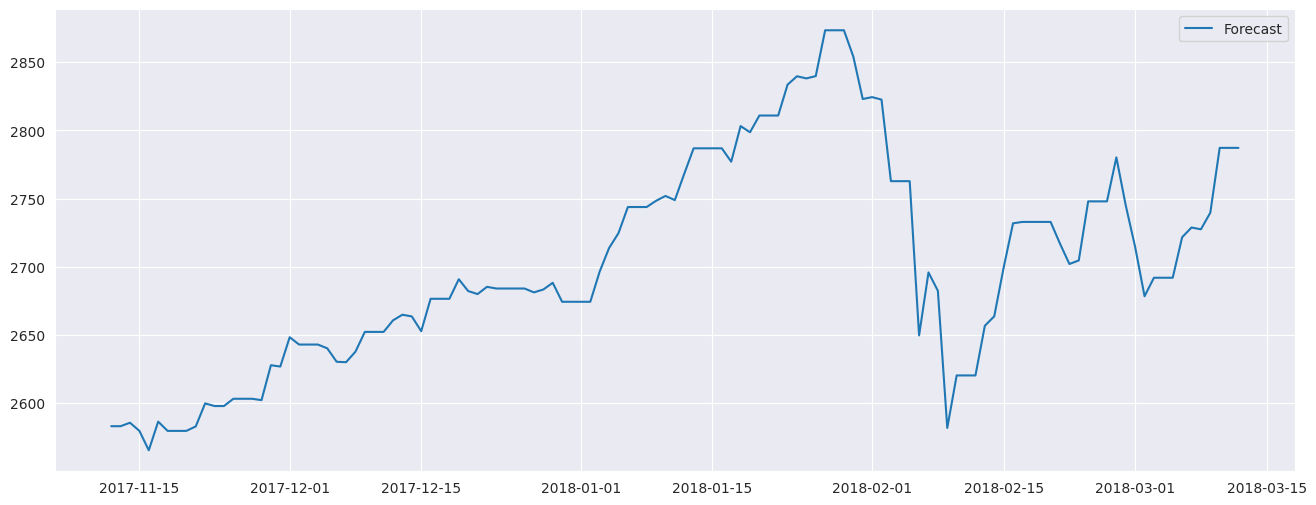

In [23]:
# Define figure style, plot package and default figure size
sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc("figure", figsize=(16, 6))
# Use plot_predict and visualize forecasts
figure = results.plot_predict(720, 840)

## Test the Forecasting capability of the Autoregression()

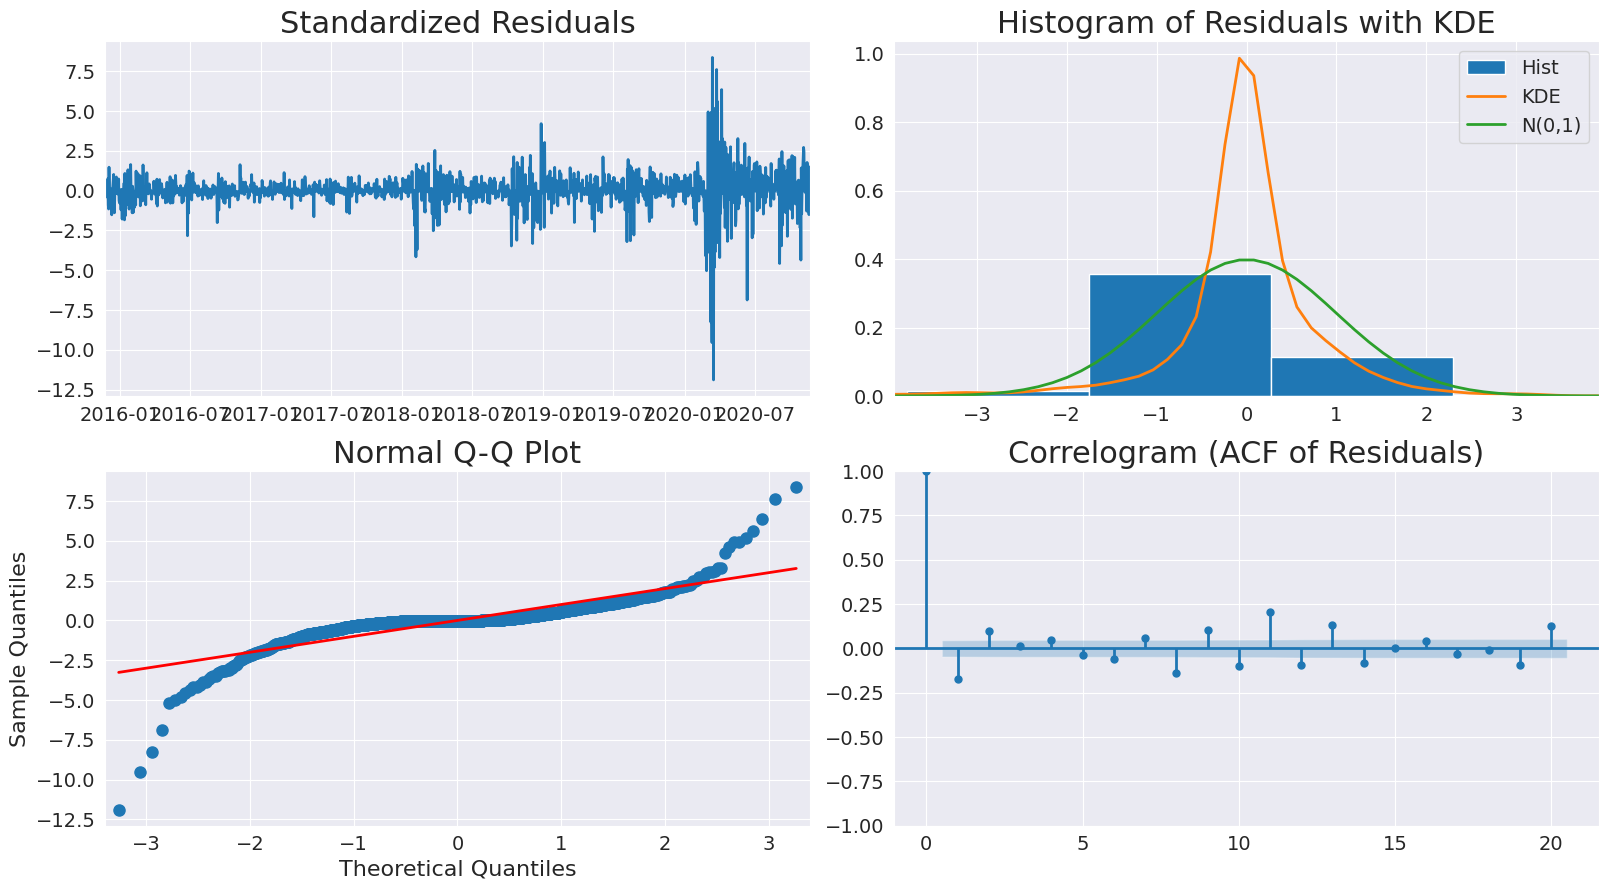

In [24]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Define figure style and default figure size
sns.set_style("darkgrid")

# Set larger font sizes and line width for clarity in presentations
plt.rcParams.update({
    'figure.figsize': (16, 9),
    'axes.titlesize': 20,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'lines.linewidth': 2,
    'lines.markersize': 8
})

# Create the diagnostic plot
fig = plt.figure(figsize=(16, 9))
fig = results.plot_diagnostics(fig=fig, lags=20)

# Add more informative titles to each subplot
fig.axes[0].set_title('Standardized Residuals', fontsize=22)
fig.axes[1].set_title('Histogram of Residuals with KDE', fontsize=22)
fig.axes[2].set_title('Normal Q-Q Plot', fontsize=22)
fig.axes[3].set_title('Correlogram (ACF of Residuals)', fontsize=22)

# Adjust the layout to prevent overlap of titles and labels
plt.tight_layout()

# Show the plot
plt.show()


####  1. **Residuals are evenly distributed:** The model's errors are random and unbiased.
####  2. **Residuals are approximately normal:** The distribution is bell-shaped, but there might be a few outliers.
####  3. **Q-Q plot shows some deviations:** The residuals might have outliers.
####  4. **No significant autocorrelation:** The residuals are not correlated with each other.


In [25]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your DataFrame with 'Close' as a column and Date as the index
data.index = pd.to_datetime(data.index)

# Split the data
train_size = int(len(data) * 0.8)
train_start_dt = data.index[0]
test_start_dt = data.index[train_size]

# Create train and test sets
train = data[data.index < test_start_dt][['Close']]
test = data[data.index >= test_start_dt][['Close']]

print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

Training data shape:  (1460, 1)
Test data shape:  (365, 1)


In [26]:
# Scale data to be in range (0, 1)
scaler = MinMaxScaler()
train['Close'] = scaler.fit_transform(train[['Close']])
test['Close'] = scaler.transform(test[['Close']])

# Specify the number of steps to forecast ahead
HORIZON = 5  # You can adjust this value
print('Forecasting horizon:', HORIZON, 'days')

Forecasting horizon: 5 days


In [27]:
# Create a test data point for each HORIZON step
test_shifted = test.copy()
for t in range(1, HORIZON):
    test_shifted[f'Close+{t}'] = test_shifted['Close'].shift(-t)
test_shifted = test_shifted.dropna(how='any')

# Make predictions on the test data
training_window = 60  # You can adjust this value
history = list(train['Close'])
history = history[-training_window:]
predictions = []

for t in range(len(test_shifted)):
    model = AutoReg(history, lags=5)  # You can adjust the number of lags
    model_fit = model.fit()
    yhat = model_fit.forecast(steps=HORIZON)
    predictions.append(yhat)
    obs = list(test_shifted.iloc[t])
    history.append(obs[0])
    history = history[-training_window:]
    if t % 100 == 0:  # Print progress every 100 steps
        print(f'Predicted {t+1}/{len(test_shifted)}')

Predicted 1/361
Predicted 101/361
Predicted 201/361
Predicted 301/361


RMSE: 58.14420711680542


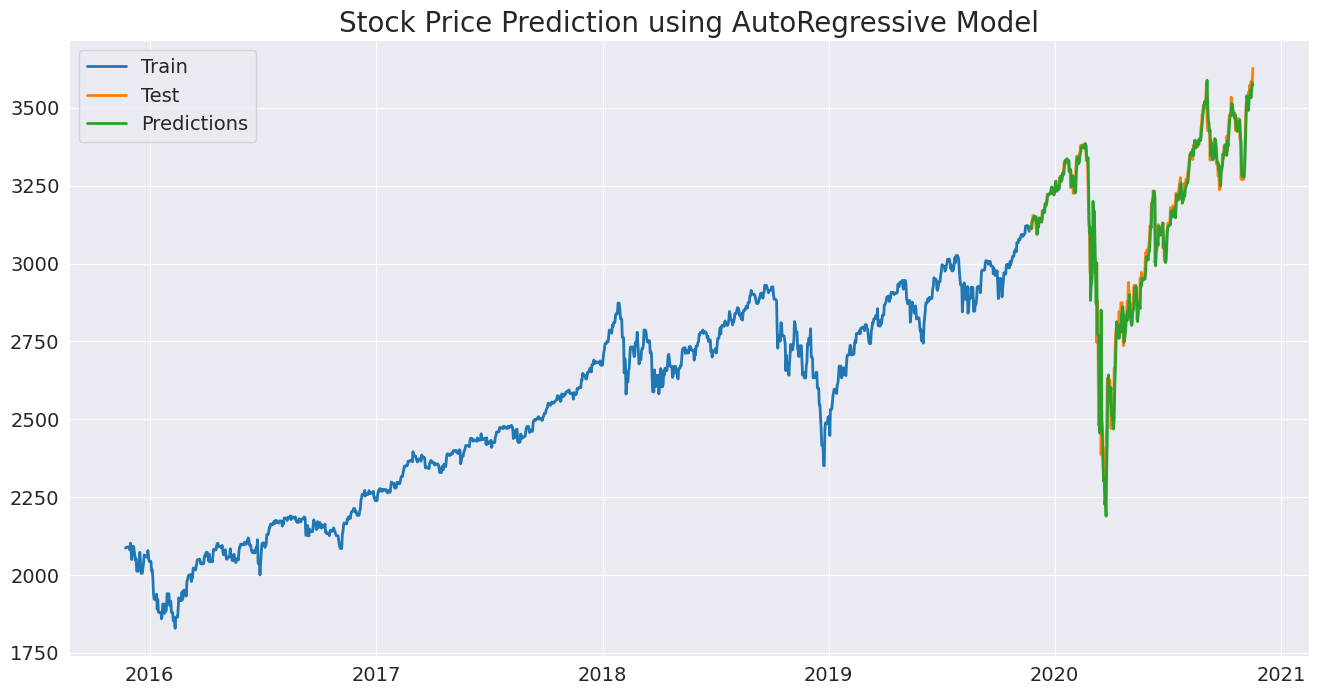

In [28]:
# Reshape predictions and inverse transform
predictions = np.array(predictions)[:, 0]  # Take only the first prediction for each step
predictions = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()

# Inverse transform the test data
test_values = scaler.inverse_transform(test[['Close']])

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_values[:len(predictions)], predictions))
print(f'RMSE: {rmse}')

# Plot the results
plt.figure(figsize=(16,8))
plt.plot(train.index, scaler.inverse_transform(train[['Close']]), label='Train')
plt.plot(test.index[:len(predictions)], test_values[:len(predictions)], label='Test')
plt.plot(test.index[:len(predictions)], predictions, label='Predictions')
plt.legend()
plt.title('Stock Price Prediction using AutoRegressive Model')
plt.show()

In [29]:
# # Reshape predictions and inverse transform
# predictions = np.array(predictions)[:, 0]  # Take only the first prediction for each step
# predictions = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()

# # Inverse transform the test data
# test_values = scaler.inverse_transform(test[['Close']])

# # Calculate RMSE
# rmse = np.sqrt(mean_squared_error(test_values[:len(predictions)], predictions))
# print(f'RMSE: {rmse}')

# # Plot the results with transparency for the Predictions line
# plt.figure(figsize=(16,8))
# plt.plot(train.index, scaler.inverse_transform(train[['Close']]), label='Train')
# plt.plot(test.index[:len(predictions)], test_values[:len(predictions)], label='Test')
# plt.plot(test.index[:len(predictions)], predictions, label='Predictions', alpha=0.6)  # Adjust alpha for transparency
# plt.legend()
# plt.title('Stock Price Prediction using AutoRegressive Model')
# plt.show()


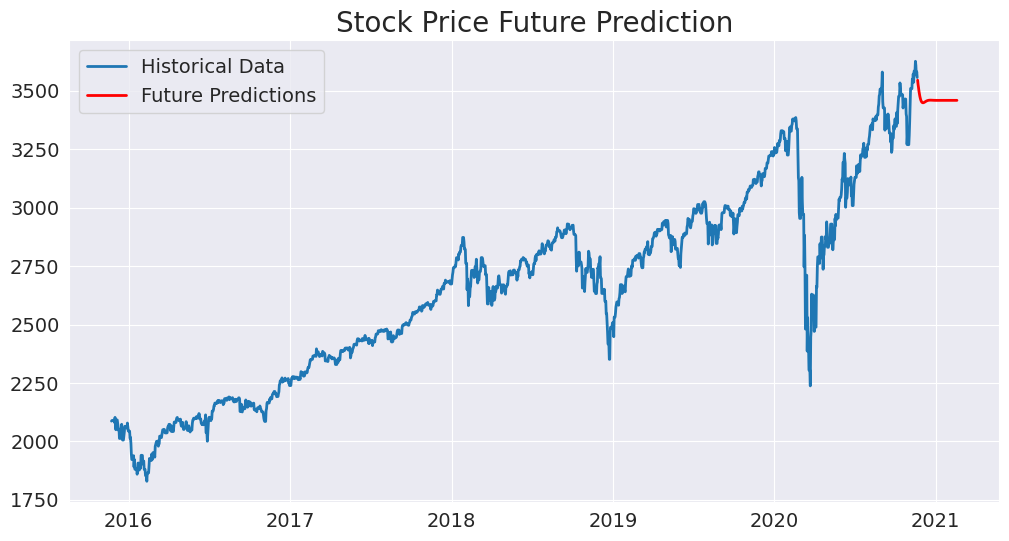

In [30]:
# Make future predictions
future_history = list(train['Close']) + list(test['Close'])
future_history = future_history[-training_window:]
future_model = AutoReg(future_history, lags=5)
future_model_fit = future_model.fit()
future_predictions = future_model_fit.forecast(steps=90)
future_predictions = scaler.inverse_transform(future_predictions.reshape(-1, 1)).flatten()

future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=90)

plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label='Historical Data')
plt.plot(future_dates, future_predictions, label='Future Predictions', color='red')
plt.legend()
plt.title('Stock Price Future Prediction')
plt.show()

#### The analysis of the model's performance indicates the following:

1. **Model Performance**: 
   - The RMSE of 58.14 is low compared to the stock price range of 2000 to 3500, suggesting a small prediction error (about 1.7% to 2.9%).
   - The model captures the overall trend well, closely following the actual data, though it lags slightly behind rapid changes.

2. **Future Predictions**: 
   - The model predicts a flat trend in the future, typical for AutoRegressive models when forecasting far ahead.


4. **Potential Enhancements**:
   - **Feature Engineering**: Adding features like moving averages or technical indicators could help capture complex patterns.
   - **Model Complexity**: Experimenting with different lag values or more sophisticated models (e.g., ARIMA, SARIMA, LSTM) might improve performance.
   - **Handling Volatility**: Incorporating a volatility model like GARCH could better handle market fluctuations.
   - **Seasonal Decomposition**: Consider modeling seasonal patterns separately if they exist.
   - **External Factors**: Incorporating factors like market indices or economic indicators could enhance the model.
   - **Rolling Window Optimization**: Finding an optimal training window size may balance capturing recent trends and stability.
   - **Evaluation Metrics**: Using metrics like MAPE or directional accuracy could provide a more comprehensive performance view.
   - **Confidence Intervals**: Adding confidence intervals to predictions can offer a range of possible outcomes.
   - **Cross-Validation**: Implementing time series cross-validation can provide a robust performance estimate.

Overall, the current model performs well in capturing the stock price trend, with suggested enhancements potentially improving accuracy and reliability.


## Moving Average

In [31]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'data' is your DataFrame and 'Close' is the column of interest
# Define the order for the Moving Average model: (p, d, q)
# Here, p=0 (no autoregression), d=0 (no differencing), q=1 (first-order moving average)
MovAvg_Model = ARIMA(data['Close'], order=(0, 0, 1))

# Fit the model
MovAvg_Result = MovAvg_Model.fit()

# Print the summary of the model
print(MovAvg_Result.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1825
Model:                 ARIMA(0, 0, 1)   Log Likelihood              -12366.631
Date:                Sun, 27 Apr 2025   AIC                          24739.262
Time:                        17:35:45   BIC                          24755.790
Sample:                    11-23-2015   HQIC                         24745.359
                         - 11-20-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2647.8735      9.772    270.968      0.000    2628.721    2667.026
ma.L1          0.9654      0.006    163.172      0.000       0.954       0.977
sigma2      4.494e+04   1857.247     24.195      0.0

## 26/08/2024 

## SARIMAX

Training data shape:  (1460, 1)
Test data shape:  (365, 1)
Forecasting horizon: 5 days
Predicted 1/361


Predicted 101/361
Predicted 201/361
Predicted 301/361
RMSE: 56.29588546215637


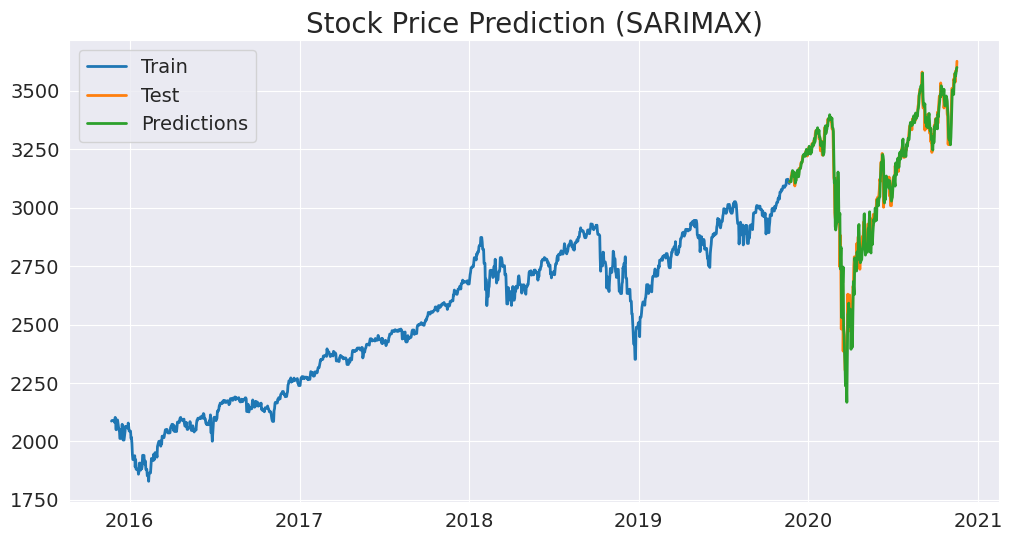

In [32]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import warnings
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
warnings.filterwarnings("ignore")

# Assuming 'data' is your DataFrame with 'Close' as a column and Date as the index
data.index = pd.to_datetime(data.index)

# Split the data
train_size = int(len(data) * 0.8)
test_start_dt = data.index[train_size]

# Create train and test sets
train = data[data.index < test_start_dt][['Close']]
test = data[data.index >= test_start_dt][['Close']]

print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

# Scale data to be in range (0, 1)
scaler = MinMaxScaler()
train['Close'] = scaler.fit_transform(train[['Close']])
test['Close'] = scaler.transform(test[['Close']])

# Specify the number of steps to forecast ahead
HORIZON = 5  # Adjust as needed
print('Forecasting horizon:', HORIZON, 'days')

# Create a test data point for each HORIZON step
test_shifted = test.copy()
for t in range(1, HORIZON):
    test_shifted[f'Close+{t}'] = test_shifted['Close'].shift(-t)
test_shifted = test_shifted.dropna(how='any')

# Define the order and seasonal order for the SARIMAX model
order = (1, 1, 1)  # Perform AIC/BIC optimization to select the best parameters
seasonal_order = (1, 1, 1, 12)  # Adjust this if you have different seasonality

# Make predictions on the test data
training_window = 120  # Increased window size to capture more data
history = list(train['Close'])[-training_window:]

predictions = []
for t in range(len(test_shifted)):
    model = SARIMAX(history, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    
    yhat = model_fit.forecast(steps=HORIZON)
    predictions.append(yhat[0])
    
    obs = list(test_shifted.iloc[t])
    history.append(obs[0])
    history = history[-training_window:]
    
    if t % 100 == 0:  # Print progress every 100 steps
        print(f'Predicted {t+1}/{len(test_shifted)}')

# Inverse transform predictions and test data
predictions = np.array(predictions).reshape(-1, 1)
predictions = scaler.inverse_transform(predictions).flatten()
test_values = scaler.inverse_transform(test[['Close']])

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_values[:len(predictions)], predictions))
print(f'RMSE: {rmse}')

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(train.index, scaler.inverse_transform(train[['Close']]), label='Train')
plt.plot(test.index[:len(predictions)], test_values[:len(predictions)], label='Test')
plt.plot(test.index[:len(predictions)], predictions, label='Predictions')
plt.legend()
plt.title('Stock Price Prediction (SARIMAX)')
plt.show()

# # Make future predictions
# future_history = list(train['Close']) + list(test['Close'])
# future_history = future_history[-training_window:]

# future_model = SARIMAX(future_history, order=order, seasonal_order=seasonal_order)
# future_model_fit = future_model.fit(disp=False)

# future_predictions = future_model_fit.forecast(steps=90)
# future_predictions = scaler.inverse_transform(future_predictions.reshape(-1, 1)).flatten()

# future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=90)

# plt.figure(figsize=(12,6)) 
# plt.plot(data.index, data['Close'], label='Historical Data')
# plt.plot(future_dates, future_predictions, label='Future Predictions', color='red')
# plt.legend()
# plt.title('Stock Price Future Prediction (SARIMAX)')
# plt.show()


## ARIMA 

Training data shape:  (1460, 1)
Test data shape:  (365, 1)
Forecasting horizon: 5 days
Predicted 1/361
Predicted 101/361
Predicted 201/361
Predicted 301/361
RMSE: 51.57418344760847


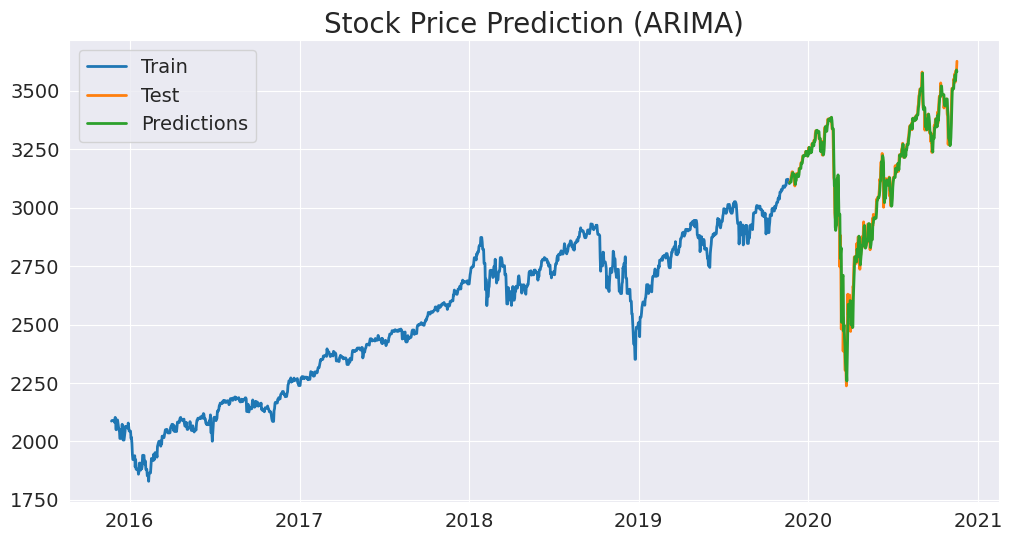

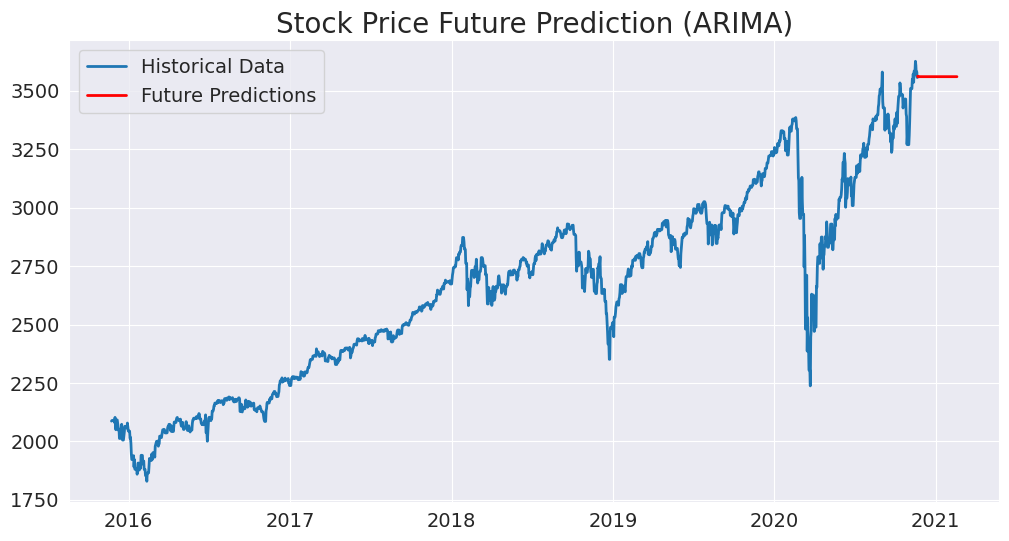

In [33]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import warnings
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
warnings.filterwarnings("ignore")


# Assuming 'data' is your DataFrame with 'Close' as a column and Date as the index
data.index = pd.to_datetime(data.index)

# Split the data
train_size = int(len(data) * 0.8)
test_start_dt = data.index[train_size]

# Create train and test sets
train = data[data.index < test_start_dt][['Close']]
test = data[data.index >= test_start_dt][['Close']]

print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

# Scale data to be in range (0, 1)
scaler = MinMaxScaler()
train['Close'] = scaler.fit_transform(train[['Close']])
test['Close'] = scaler.transform(test[['Close']])

# Specify the number of steps to forecast ahead
HORIZON = 5  # Adjust as needed
print('Forecasting horizon:', HORIZON, 'days')

# Create a test data point for each HORIZON step
test_shifted = test.copy()
for t in range(1, HORIZON):
    test_shifted[f'Close+{t}'] = test_shifted['Close'].shift(-t)
test_shifted = test_shifted.dropna(how='any')

# Define the order for the ARIMA model
order = (1, 1, 1)  # Perform AIC/BIC optimization to select the best parameters

# Make predictions on the test data
training_window = 120  # Increased window size to capture more data
history = list(train['Close'])[-training_window:]

predictions = []
for t in range(len(test_shifted)):
    model = ARIMA(history, order=order)
    model_fit = model.fit()
    
    yhat = model_fit.forecast(steps=HORIZON)
    predictions.append(yhat[0])
    
    obs = list(test_shifted.iloc[t])
    history.append(obs[0])
    history = history[-training_window:]
    
    if t % 100 == 0:  # Print progress every 100 steps
        print(f'Predicted {t+1}/{len(test_shifted)}')

# Inverse transform predictions and test data
predictions = np.array(predictions).reshape(-1, 1)
predictions = scaler.inverse_transform(predictions).flatten()
test_values = scaler.inverse_transform(test[['Close']])

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_values[:len(predictions)], predictions))
print(f'RMSE: {rmse}')

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(train.index, scaler.inverse_transform(train[['Close']]), label='Train')
plt.plot(test.index[:len(predictions)], test_values[:len(predictions)], label='Test')
plt.plot(test.index[:len(predictions)], predictions, label='Predictions')
plt.legend()
plt.title('Stock Price Prediction (ARIMA)')
plt.show()

# Make future predictions
future_history = list(train['Close']) + list(test['Close'])
future_history = future_history[-training_window:]

future_model = ARIMA(future_history, order=order)
future_model_fit = future_model.fit()

future_predictions = future_model_fit.forecast(steps=90)
future_predictions = scaler.inverse_transform(future_predictions.reshape(-1, 1)).flatten()

future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=90)

plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label='Historical Data')
plt.plot(future_dates, future_predictions, label='Future Predictions', color='red')
plt.legend()
plt.title('Stock Price Future Prediction (ARIMA)')
plt.show()


## Deep Learning 

2025-04-27 17:46:20.823722: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Cross-validation scores: [0.00010428337554913014, 0.00044358253944665194, 0.000723055680282414, 0.00042054190998896956, 0.003553715068846941]
Mean CV score: 0.0010490357148228214
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Root Mean Squared Error: 54.46023134644598
Mean Absolute Error: 34.55486200274199
R-squared Score: 0.9817648435129718


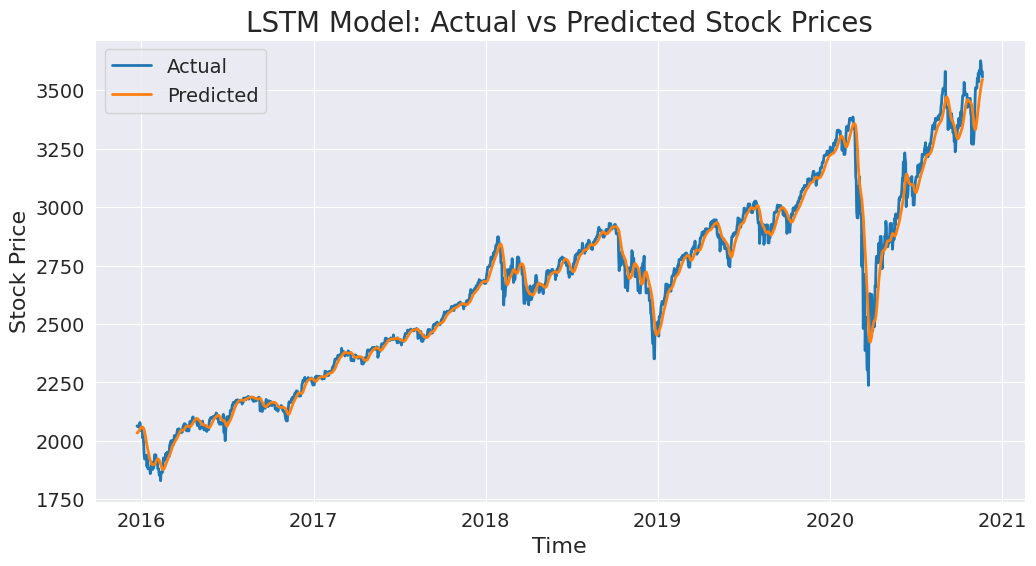

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load and preprocess the data
data = pd.read_csv("yahoo_stock.csv", parse_dates=['Date'])
data = data.sort_values('Date').set_index('Date')['Close']

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(scaled_data, seq_length)

# Reshape X to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Callbacks
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
lr_reducer = ReduceLROnPlateau(factor=0.5, patience=5)

# Perform Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)
cv_scores = []

for train_index, val_index in tscv.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    model.fit(X_train, y_train, epochs=100, batch_size=32, 
              validation_data=(X_val, y_val), 
              callbacks=[early_stopping, lr_reducer], verbose=0)
    
    score = model.evaluate(X_val, y_val, verbose=0)
    cv_scores.append(score)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {np.mean(cv_scores)}")

# Make predictions on the entire dataset
y_pred = model.predict(X)

# Inverse transform the predictions and actual values
y_pred_orig = scaler.inverse_transform(y_pred)
y_orig = scaler.inverse_transform(y.reshape(-1, 1))

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_orig, y_pred_orig))
mae = mean_absolute_error(y_orig, y_pred_orig)
r2 = r2_score(y_orig, y_pred_orig)

print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data.index[seq_length:], y_orig, label='Actual')
plt.plot(data.index[seq_length:], y_pred_orig, label='Predicted')
plt.legend()
plt.title('LSTM Model: Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Root Mean Squared Error: 102.88299862905373
Mean Absolute Error: 78.72217612943942
R-squared Score: 0.8597175893337944


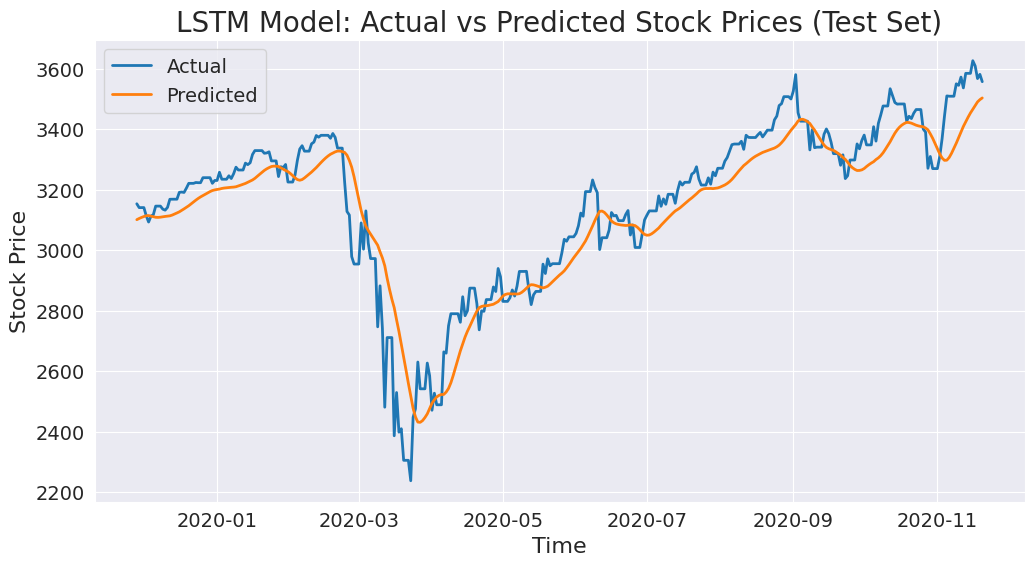

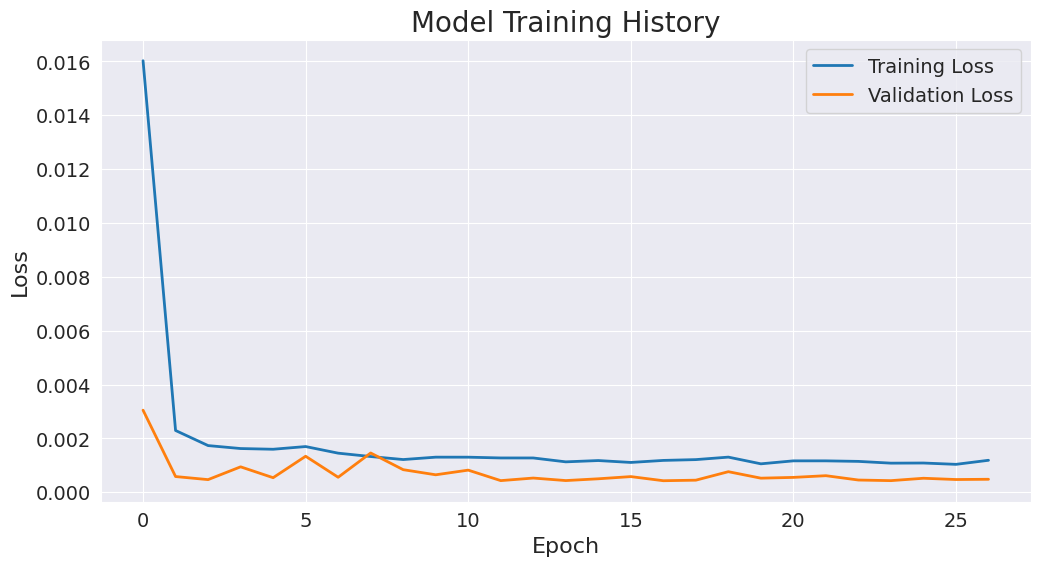

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load and preprocess the data
data = pd.read_csv("yahoo_stock.csv", parse_dates=['Date'])
data = data.sort_values('Date').set_index('Date')['Close']

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(scaled_data, seq_length)

# Reshape X to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Callbacks
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
lr_reducer = ReduceLROnPlateau(factor=0.5, patience=5)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[early_stopping, lr_reducer], verbose=0)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred_orig = scaler.inverse_transform(y_pred)
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
mae = mean_absolute_error(y_test_orig, y_pred_orig)
r2 = r2_score(y_test_orig, y_pred_orig)

print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data.index[train_size+seq_length:], y_test_orig, label='Actual')
plt.plot(data.index[train_size+seq_length:], y_pred_orig, label='Predicted')
plt.legend()
plt.title('LSTM Model: Actual vs Predicted Stock Prices (Test Set)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [39]:
# from statsmodels.tsa.holtwinters import ExponentialSmoothing

# # Fit ETS model
# model_ets = ExponentialSmoothing(data['Price'], trend='add', seasonal='add', seasonal_periods=12)
# model_ets_fit = model_ets.fit()

# # Forecast
# forecast_steps = 30
# forecast_ets = model_ets_fit.forecast(steps=forecast_steps)

# # Plot forecast
# plt.figure(figsize=(14, 7))
# plt.plot(data.index[-100:], data['Price'][-100:], label='Actual')
# plt.plot(pd.date_range(data.index[-1], periods=forecast_steps, freq='D'), forecast_ets, label='Forecast')
# plt.title('ETS Model Forecast')
# plt.legend()
# plt.show()

# # Performance Metrics
# forecast_ets_test = model_ets_fit.forecast(steps=len(test))

# mse_ets = mean_squared_error(test['Price'], forecast_ets_test)
# mae_ets = mean_absolute_error(test['Price'], forecast_ets_test)
# mape_ets = mean_absolute_percentage_error(test['Price'], forecast_ets_test)

# print(f'ETS Mean Squared Error: {mse_ets}')
# print(f'ETS Mean Absolute Error: {mae_ets}')
# print(f'ETS Mean Absolute Percentage Error: {mape_ets}')

# # Plot the forecast vs actuals for the test set
# plt.figure(figsize=(14, 7))
# plt.plot(train.index, train['Price'], label='Training Data')
# plt.plot(test.index, test['Price'], label='Test Data')
# plt.plot(test.index, forecast_ets_test, label='Forecast')
# plt.title('ETS Model Forecast vs Actual')
# plt.legend()
# plt.show()


## Prophet Model

In [40]:
# from prophet import Prophet

# # Prepare the data for Prophet
# prophet_data = data.reset_index().rename(columns={'Date': 'ds', 'Price': 'y'})

# # Initialize the model
# model_prophet = Prophet()
# model_prophet.fit(prophet_data)

# # Forecast
# future = model_prophet.make_future_dataframe(periods=30)
# forecast_prophet = model_prophet.predict(future)

# # Plot forecast
# fig = model_prophet.plot(forecast_prophet)
# plt.title('Prophet Model Forecast')
# plt.show()

# # Performance Metrics
# prophet_data_train = prophet_data.iloc[:train_size]
# prophet_data_test = prophet_data.iloc[train_size:]

# # Fit the model on the training set
# model_prophet = Prophet()
# model_prophet.fit(prophet_data_train)

# # Forecast on the test set
# future_test = model_prophet.make_future_dataframe(periods=len(prophet_data_test), include_history=False)
# forecast_prophet_test = model_prophet.predict(future_test)

# mse_prophet = mean_squared_error(prophet_data_test['y'], forecast_prophet_test['yhat'])
# mae_prophet = mean_absolute_error(prophet_data_test['y'], forecast_prophet_test['yhat'])
# mape_prophet = mean_absolute_percentage_error(prophet_data_test['y'], forecast_prophet_test['yhat'])

# print(f'Prophet Mean Squared Error: {mse_prophet}')
# print(f'Prophet Mean Absolute Error: {mae_prophet}')
# print(f'Prophet Mean Absolute Percentage Error: {mape_prophet}')

# # Plot the forecast vs actuals for the test set
# plt.figure(figsize=(14, 7))
# plt.plot(train.index, train['Price'], label='Training Data')
# plt.plot(test.index, test['Price'], label='Test Data')
# plt.plot(test.index, forecast_prophet_test['yhat'], label='Forecast')
# plt.title('Prophet Model Forecast vs Actual')
# plt.legend()
# plt.show()


In [41]:
# # Ensure the forecast lengths match the test dataset length
# min_length = min(len(forecast_arima_test), len(forecast_ets_test), len(forecast_prophet_test), len(test))

# # Trim all forecasts to match the minimum length
# forecast_arima_test_trimmed = forecast_arima_test[:min_length]
# forecast_ets_test_trimmed = forecast_ets_test[:min_length]
# forecast_prophet_test_trimmed = forecast_prophet_test['yhat'][:min_length]
# test_trimmed = test['Price'][:min_length]

# # Combine the forecasts
# combined_forecast = (forecast_arima_test_trimmed + forecast_ets_test_trimmed + forecast_prophet_test_trimmed) / 3

# # Performance Metrics
# mse_combined = mean_squared_error(test_trimmed, combined_forecast)
# mae_combined = mean_absolute_error(test_trimmed, combined_forecast)
# mape_combined = mean_absolute_percentage_error(test_trimmed, combined_forecast)

# print(f'Combined Mean Squared Error: {mse_combined}')
# print(f'Combined Mean Absolute Error: {mae_combined}')
# print(f'Combined Mean Absolute Percentage Error: {mape_combined}')

# # Plot the combined forecast vs actuals for the test set
# plt.figure(figsize=(14, 7))
# plt.plot(train.index, train['Price'], label='Training Data')
# plt.plot(test.index[:min_length], test_trimmed, label='Test Data')
# plt.plot(test.index[:min_length], combined_forecast, label='Combined Forecast')
# plt.title('Combined Model Forecast vs Actual')
# plt.legend()
# plt.show()


17:49:17 - cmdstanpy - INFO - Chain [1] start processing
17:49:18 - cmdstanpy - INFO - Chain [1] done processing


Root Mean Squared Error: 381.1358527010655
Mean Absolute Error: 284.58822486045113
R-squared Score: -0.9567163115229587


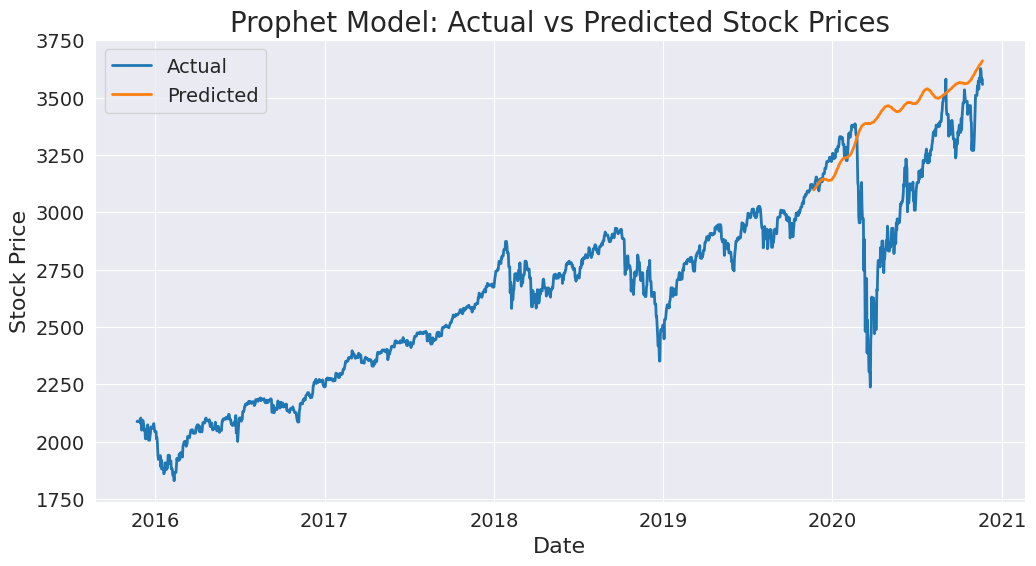

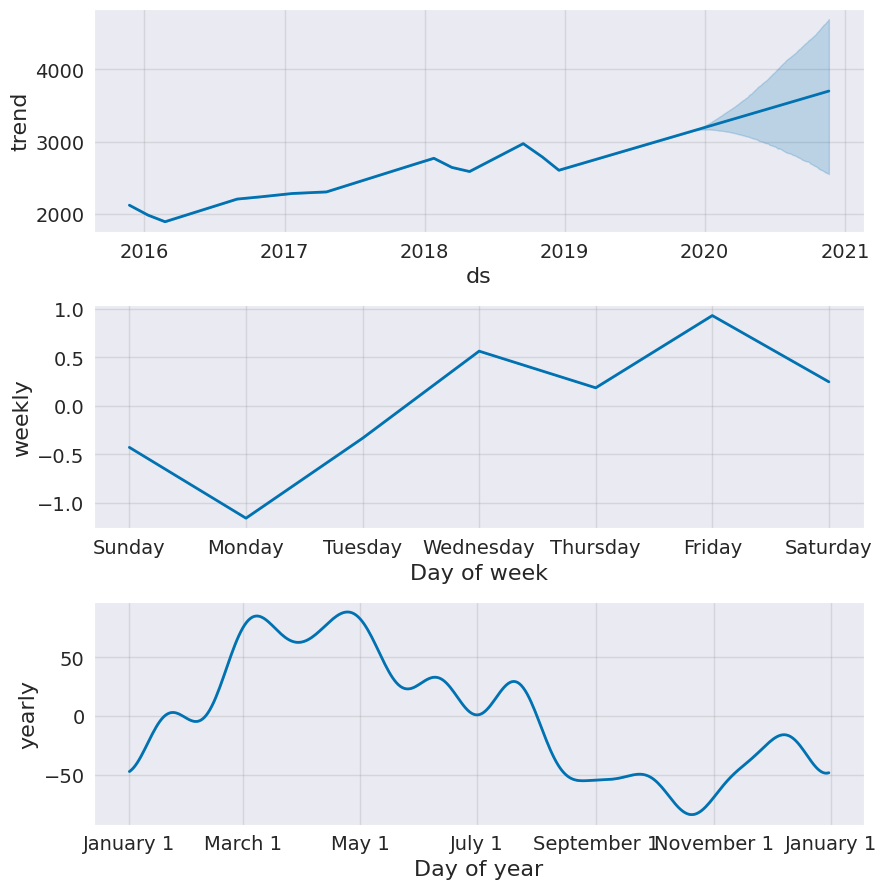

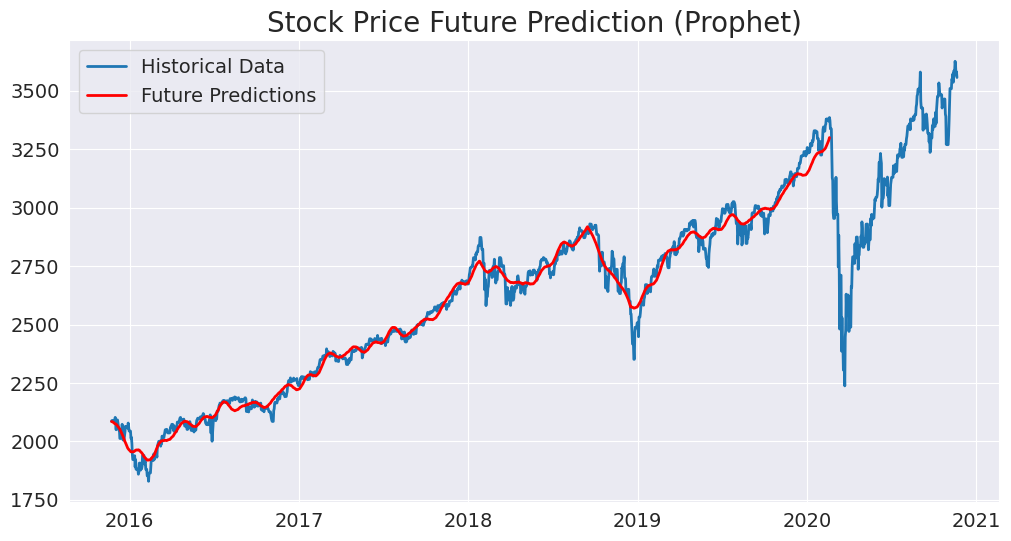

In [44]:
# Import necessary libraries
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the data
data = pd.read_csv("yahoo_stock.csv", parse_dates=['Date'])
data = data.sort_values('Date').set_index('Date')

# Select only the 'Close' column
target = 'Close'
data = data[[target]].reset_index()

# Rename columns to match Prophet's expected format
data = data.rename(columns={'Date': 'ds', 'Close': 'y'})

# Train-test split
split = int(0.8 * len(data))
train_data = data[:split]
test_data = data[split:]

# Initialize the Prophet model
model = Prophet()

# Fit the model on the training data
model.fit(train_data)

# Create a dataframe for future predictions
future = model.make_future_dataframe(periods=len(test_data))

# Make predictions
forecast = model.predict(future)

# Extract the predicted values for the test period
predictions = forecast[['ds', 'yhat']].iloc[split:]

# Evaluate the performance
rmse = np.sqrt(mean_squared_error(test_data['y'], predictions['yhat']))
mae = mean_absolute_error(test_data['y'], predictions['yhat'])
r2 = r2_score(test_data['y'], predictions['yhat'])

print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data['ds'], data['y'], label='Actual')
plt.plot(predictions['ds'], predictions['yhat'], label='Predicted')
plt.legend()
plt.title('Prophet Model: Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

# Plot the forecast components (trend, weekly, yearly)
model.plot_components(forecast)
plt.show()

# Make future predictions beyond the test period
future_steps = 90
future_data = model.make_future_dataframe(periods=future_steps)
forecast_future = model.predict(future_data)

# Plot future predictions
plt.figure(figsize=(12, 6))
plt.plot(data['ds'], data['y'], label='Historical Data')
plt.plot(forecast_future['ds'], forecast_future['yhat'], label='Future Predictions', color='red')
plt.legend()
plt.title('Stock Price Future Prediction (Prophet)')
plt.show()


17:49:49 - cmdstanpy - INFO - Chain [1] start processing
17:49:50 - cmdstanpy - INFO - Chain [1] done processing


Root Mean Squared Error: 360.2501940577743
Mean Absolute Error: 270.16714468641953
R-squared Score: -0.7056697545636559


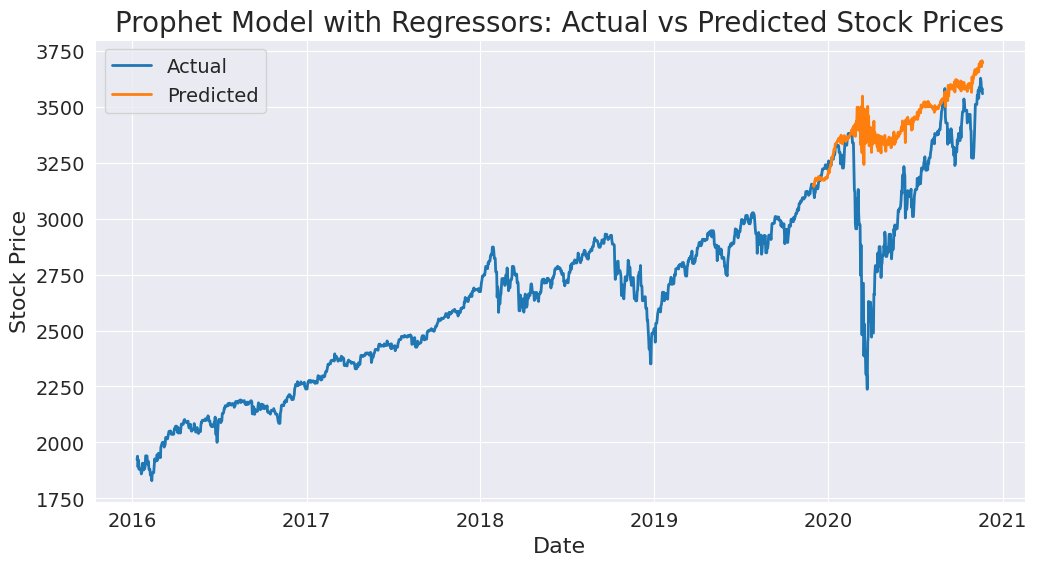

In [45]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the data
data = pd.read_csv("yahoo_stock.csv", parse_dates=['Date'])
data = data.sort_values('Date').set_index('Date')

# Select the 'Close' column and create additional features
data['log_returns'] = np.log(data['Close'] / data['Close'].shift(1))
data['MA_50'] = data['Close'].rolling(window=50).mean()
data = data.dropna().reset_index()

# Rename columns to match Prophet's expected format
data = data.rename(columns={'Date': 'ds', 'Close': 'y'})

# Train-test split
split = int(0.8 * len(data))
train_data = data[:split]
test_data = data[split:]

# Initialize the Prophet model
model = Prophet()

# Add regressors
model.add_regressor('log_returns')
model.add_regressor('MA_50')

# Fit the model on the training data
model.fit(train_data)

# Create a dataframe for future predictions including the regressors
future = model.make_future_dataframe(periods=len(test_data))
future['log_returns'] = data['log_returns']
future['MA_50'] = data['MA_50']

# Make predictions
forecast = model.predict(future)

# Extract the predicted values for the test period
predictions = forecast[['ds', 'yhat']].iloc[split:]

# Evaluate the performance
rmse = np.sqrt(mean_squared_error(test_data['y'], predictions['yhat']))
mae = mean_absolute_error(test_data['y'], predictions['yhat'])
r2 = r2_score(test_data['y'], predictions['yhat'])

print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data['ds'], data['y'], label='Actual')
plt.plot(predictions['ds'], predictions['yhat'], label='Predicted')
plt.legend()
plt.title('Prophet Model with Regressors: Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()


17:50:30 - cmdstanpy - INFO - Chain [1] start processing
17:50:30 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/3 [00:00<?, ?it/s]17:50:30 - cmdstanpy - INFO - Chain [1] start processing
17:50:30 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 1/3 [00:00<00:00,  2.77it/s]17:50:30 - cmdstanpy - INFO - Chain [1] start processing
17:50:31 - cmdstanpy - INFO - Chain [1] done processing
 67%|██████▋   | 2/3 [00:00<00:00,  2.36it/s]17:50:31 - cmdstanpy - INFO - Chain [1] start processing
17:50:31 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 3/3 [00:01<00:00,  2.30it/s]


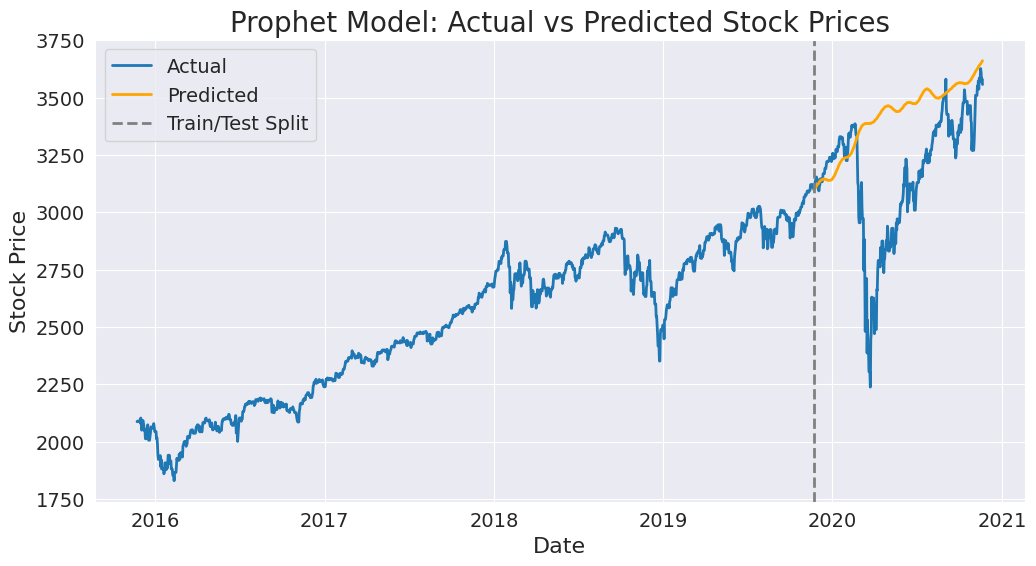

Performance Metrics:
rmse   177.55
mae    147.54
mape     0.05
dtype: float64


In [47]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the data
data = pd.read_csv("yahoo_stock.csv", parse_dates=['Date'])
data = data.sort_values('Date').set_index('Date')

# Use only the 'Close' column
data = data[['Close']].dropna().reset_index()

# Rename columns to match Prophet's expected format
data = data.rename(columns={'Date': 'ds', 'Close': 'y'})

# Train-test split
split = int(0.8 * len(data))
train_data = data[:split]
test_data = data[split:]

# Initialize the Prophet model with a smaller changepoint_prior_scale for less sensitivity
model = Prophet(changepoint_prior_scale=0.05, seasonality_prior_scale=10.0)

# Fit the model on the training data
model.fit(train_data)

# Cross-validation
cv_results = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')
performance = performance_metrics(cv_results)

# Create a dataframe for future predictions
future = model.make_future_dataframe(periods=len(test_data))

# Make predictions
forecast = model.predict(future)

# Extract the predicted values for the test period
predictions = forecast[['ds', 'yhat']].iloc[split:]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data['ds'], data['y'], label='Actual')
plt.plot(predictions['ds'], predictions['yhat'], label='Predicted', color='orange')
plt.axvline(x=data['ds'][split], color='gray', linestyle='--', label='Train/Test Split')
plt.legend()
plt.title('Prophet Model: Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

# Performance Metrics
print(f"Performance Metrics:\n{performance[['rmse', 'mae', 'mape']].mean()}")
